<a href="https://colab.research.google.com/github/Sanzid-Priam/Estimating-lower-extremity-joint-angles-during-gait-using-reduced-number-of-sensors-count-/blob/main/ICDIP_Kinematics_Net.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Let`s import all packages that we may need:
import numpy
import tensorflow as tf
import statistics
from numpy import loadtxt
import matplotlib.pyplot as plt
import pandas
import math
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import GRU,LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from statistics import stdev
import math

from tensorflow.keras.models import load_model



import numpy as np
from scipy.signal import butter,filtfilt

import sys
import numpy as np # linear algebra
from scipy.stats import randint
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv), data manipulation as in SQL
import matplotlib.pyplot as plt # this is used for the plot the graph
import seaborn as sns # used for plot interactive graph.
import pandas
import matplotlib.pyplot as plt

## for Deep-learing:
import tensorflow.keras
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
to_categorical([0, 1, 2, 3], num_classes=4)
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import EarlyStopping
# from tensorflow.keras.utils import np_utils
import itertools
from tensorflow.keras.layers import LSTM
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers import Dropout
from keras.layers import TimeDistributed
from keras.layers import Flatten
from keras.layers import Bidirectional
#import constraint

from sklearn.model_selection import train_test_split
from keras.regularizers import l2


###  Library for attention layers

import pandas as pd
#import pyarrow.parquet as pq # Used to read the data
import os
import numpy as np
from tensorflow.keras.layers import * # Keras is the most friendly Neural Network library, this Kernel use a lot of layers classes
from tensorflow.keras.models import Model
from tqdm import tqdm # Processing time measurement
from sklearn.model_selection import train_test_split
from tensorflow.keras import backend as K # The backend give us access to tensorflow operations and allow us to create the Attention class
from tensorflow.keras import optimizers # Allow us to access the Adam class to modify some parameters
from sklearn.model_selection import GridSearchCV, StratifiedKFold # Used to use Kfold to train our model
from tensorflow.keras.callbacks import * # This object helps the model to train in a smarter way, avoiding overfitting

from tensorflow.keras.layers import Layer
import tensorflow.keras.backend as K
from tensorflow.keras import initializers
from tensorflow.keras import regularizers
import statistics
import gc
import h5py

### Early stopping

from tensorflow.keras.callbacks import EarlyStopping


from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


# Data Loader

In [ ]:
##IMU, Kin-Kinematics, HoF-Histogram of Features

def data_loader(subject):
  with h5py.File('/content/drive/My Drive/Kinematics Prediction/All_subjects_data_kinetics.h5', 'r') as hf:
    All_subjects = hf['All_subjects']
    Subject = All_subjects[subject]

    HOF=Subject['hof']
    IMU_KIN=Subject['IMU_Kin']

    treadmill_hof = HOF['Treadmill']
    levelground_hof = HOF['Levelground']
    slope_hof = HOF['Slope']
    stair_hof = HOF['Stair']
    round_hof = HOF['Round']
    obstacles_hof = HOF['Obstacles']

    treadmill_IMU_kin = IMU_KIN['Treadmill']
    levelground_IMU_kin = IMU_KIN['Levelground']
    slope_IMU_kin = IMU_KIN['Slope']
    stair_IMU_kin = IMU_KIN['Stair']
    round_IMU_kin= IMU_KIN['Round']
    obstacles_IMU_kin = IMU_KIN['Obstacles']


    hof_data=np.concatenate((treadmill_hof,levelground_hof,slope_hof,stair_hof,round_hof,obstacles_hof),axis=0)
    IMU_kin_data=np.concatenate((treadmill_IMU_kin,levelground_IMU_kin,slope_IMU_kin,stair_IMU_kin,round_IMU_kin,obstacles_IMU_kin),axis=0)

    return np.array(hof_data), np.array(IMU_kin_data)


In [ ]:
subject_1_data_hof, subject_1_data_IMU_Kin=data_loader('Subject_1')
gc.collect()
subject_2_data_hof, subject_2_data_IMU_Kin=data_loader('Subject_2')
gc.collect()
subject_3_data_hof, subject_3_data_IMU_Kin=data_loader('Subject_3')
gc.collect()
subject_4_data_hof, subject_4_data_IMU_Kin=data_loader('Subject_4')
gc.collect()
subject_5_data_hof, subject_5_data_IMU_Kin=data_loader('Subject_5')
gc.collect()
subject_6_data_hof, subject_6_data_IMU_Kin=data_loader('Subject_6')
gc.collect()
subject_7_data_hof, subject_7_data_IMU_Kin=data_loader('Subject_7')
gc.collect()
subject_8_data_hof, subject_8_data_IMU_Kin=data_loader('Subject_8')
gc.collect()
subject_9_data_hof, subject_9_data_IMU_Kin=data_loader('Subject_9')
gc.collect()
subject_10_data_hof, subject_10_data_IMU_Kin=data_loader('Subject_10')
gc.collect()

0

#Subject Selection

In [ ]:
main_dir = "/content/drive/My Drive/public dataset/Public_dataset_2/Subject01"
os.mkdir(main_dir)
path="/content/"
subject='Subject_01'
encoder='lstm'

In [ ]:
train_data_hof=np.concatenate((subject_1_data_hof,subject_2_data_hof,subject_4_data_hof,subject_5_data_hof,subject_6_data_hof,
                               subject_7_data_hof,subject_8_data_hof,subject_9_data_hof,subject_10_data_hof),axis=0)

train_data_IMU_Kin=np.concatenate((subject_1_data_IMU_Kin,subject_2_data_IMU_Kin,subject_4_data_IMU_Kin,subject_5_data_IMU_Kin,subject_6_data_IMU_Kin,
                               subject_7_data_IMU_Kin,subject_8_data_IMU_Kin,subject_9_data_IMU_Kin,subject_10_data_IMU_Kin),axis=0)

test_data_hof=subject_3_data_hof
test_data_IMU_Kin=subject_3_data_IMU_Kin

# Data Processing

In [ ]:
##### IMUs-0:48
# Sensor 1- Sternum
# Sensor 2-Sacrum
# Sensor 3-R_thigh
# Sensor 4-L_thigh
# Sensor 5-R_shank
# Sensor 6-L_shank
# Sensor 7-R_dorsal
# Sensor 8-L_dorsal

train_dataset_IMU=train_data_IMU_Kin[:,36:48]
train_dataset_hof=train_data_hof
train_dataset_target=np.concatenate((train_data_IMU_Kin[:,55:56],train_data_IMU_Kin[:,58:60],train_data_IMU_Kin[:,62:63],train_data_IMU_Kin[:,65:67]),axis=1) ## Left and right leg hip, knee,ankle angle


test_dataset_IMU=test_data_IMU_Kin[:,36:48]
test_dataset_hof=test_data_hof
test_dataset_target=np.concatenate((test_data_IMU_Kin[:,55:56],test_data_IMU_Kin[:,58:60],test_data_IMU_Kin[:,62:63],test_data_IMU_Kin[:,65:67]),axis=1)

print(train_dataset_IMU.shape)
print(train_dataset_hof.shape)
print(train_dataset_target.shape)


gc.collect()
gc.collect()
gc.collect()


(1602477, 12)
(534159, 36)
(1602477, 6)


0

# Data creation

In [ ]:
## Creating a dataset with overlapping window of 100 samples with overlap of 50 samples ##

# # convert an array of values into a dataset matrix
def create_dataset_present(dataset_1, window=100):
  dataX= []
  k=0
  shift=50
  for i in range(int(len(dataset_1)/shift)-1):
    j=shift*k
    a = dataset_1[j:j+window,:]
    dataX.append(a)
    k=k+1
  return np.array(dataX)

In [ ]:
import gc
gc.collect()

0

In [ ]:
### Reconstruction/Present Dataset ###
w=100

train_X_3=create_dataset_present(train_dataset_IMU,w)
train_y_3=create_dataset_present(train_dataset_target,w)

test_X_1D=create_dataset_present(test_dataset_IMU,w)
test_y=create_dataset_present(test_dataset_target,w)

In [ ]:
train_y_3=train_y_3.reshape(train_y_3.shape[0],w*6)
test_y=test_y.reshape(test_y.shape[0],w*6)


In [ ]:
train_X_1D, X_validation_1D, train_y_5, Y_validation = train_test_split(train_X_3,train_y_3, test_size=0.20, random_state=True)


train_X_1D=train_X_1D
X_validation_1D=X_validation_1D
test_X_1D=test_X_1D

print(train_X_1D.shape,train_y_5.shape,X_validation_1D.shape,Y_validation.shape)

(25638, 100, 12) (25638, 600) (6410, 100, 12) (6410, 600)


In [ ]:
features=6

train_X_2D=train_X_1D[:,:,0:12].reshape(train_X_1D.shape[0],train_X_1D.shape[1],features,2)
test_X_2D=test_X_1D[:,:,0:12].reshape(test_X_1D.shape[0],test_X_1D.shape[1],features,2)
X_validation_2D= X_validation_1D[:,:,0:12].reshape(X_validation_1D.shape[0],
                                                   X_validation_1D.shape[1],features,2)


print(train_X_2D.shape,test_X_2D.shape,X_validation_2D.shape)

(25638, 100, 6, 2) (3358, 100, 6, 2) (6410, 100, 6, 2)


# Different Function for models

In [ ]:
def prediction_test(yhat,test_y_up):

    test_o=test_y_up
    yhat=yhat

    y_1=yhat[:,0]
    y_2=yhat[:,1]
    y_3=yhat[:,2]
    y_4=yhat[:,3]
    y_5=yhat[:,4]
    y_6=yhat[:,5]


    y_test_1=test_o[:,0]
    y_test_2=test_o[:,1]
    y_test_3=test_o[:,2]
    y_test_4=test_o[:,3]
    y_test_5=test_o[:,4]
    y_test_6=test_o[:,5]


    ###calculate RMSE

    rmse_1 =np.sqrt(mean_squared_error(y_test_1,y_1))
    rmse_2 =np.sqrt(mean_squared_error(y_test_2,y_2))
    rmse_3 =np.sqrt(mean_squared_error(y_test_3,y_3))
    rmse_4 =np.sqrt(mean_squared_error(y_test_4,y_4))
    rmse_5 =np.sqrt(mean_squared_error(y_test_5,y_5))
    rmse_6 =np.sqrt(mean_squared_error(y_test_6,y_6))


    p_1=np.corrcoef(y_1, y_test_1)[0, 1]
    p_2=np.corrcoef(y_2, y_test_2)[0, 1]
    p_3=np.corrcoef(y_3, y_test_3)[0, 1]
    p_4=np.corrcoef(y_4, y_test_4)[0, 1]
    p_5=np.corrcoef(y_5, y_test_5)[0, 1]
    p_6=np.corrcoef(y_6, y_test_6)[0, 1]

    ### Getiing single RMSE and PCC value for a joint
    p=np.array([(p_1+p_4)/2,(p_2+p_5)/2,(p_3+p_6)/2])

    rmse=np.array([(rmse_1+rmse_4)/2,(rmse_2+rmse_5)/2,(rmse_3+rmse_6)/2])



    return rmse,p

In [ ]:
## Evaluting data with the original form without any overlaps

# # convert an array of values into a dataset matrix
def unpack_dataset_present(dataset_1):
  dataX= []
  k=1
  l=0
  shift=100
  for i in range(int(len(dataset_1)/shift)-1):
    j=shift*k
    a = dataset_1[l:j,:]
    l=0
    l=j+50
    dataX=np.append(dataX,a)
    k=k+1
    j=0
  return np.array(dataX)

# Loss Function

In [ ]:
def correlation_coefficient_loss_RMSE(y_true, y_pred):
    x = y_true
    y = y_pred
    mx = K.mean(x)
    l1=K.sqrt(K.mean(K.square(y - x)))

    return l1


In [ ]:
def correlation_coefficient_loss_joint(y_true, y_pred):
    # Calculate mean values
    mx = tf.reduce_mean(y_true)
    my = tf.reduce_mean(y_pred)

    # Calculate differences from mean
    xm, ym = y_true - mx, y_pred - my

    # Calculate numerator and denominator of Pearson correlation coefficient
    r_num = tf.reduce_sum(tf.multiply(xm, ym))
    r_den = tf.sqrt(tf.multiply(tf.reduce_sum(tf.square(xm)), tf.reduce_sum(tf.square(ym))))

    # Calculate Pearson correlation coefficient
    r = r_num / r_den

    # Clamp r between -1 and 1
    r = tf.maximum(tf.minimum(r, 1.0), -1.0)

    # Calculate l2 loss
    l2 = 1 - tf.square(r)

    l1=K.sqrt(K.mean(K.square(y_true - y_pred)))


    return l1+l2

# Model Ablation

##1. GRU-Net

In [ ]:
def GRU_Net(inputs_1D_N,inputs_2D_N):

  model_1=Bidirectional(GRU(128,return_sequences=True))(inputs_1D_N)
  model_1=Dropout(0.4)(model_1)
  model_1=Bidirectional(GRU(64,return_sequences=True))(model_1)
  model_1=Dropout(0.4)(model_1)
  model_1=Flatten()(model_1)

  output_GRU=Dense(6*w,bias_regularizer=l2(0.001), activation='linear')(model_1)


  return output_GRU

Epoch 1/30
401/401 - 22s - loss: 7.5537 - val_loss: 4.9603 - 22s/epoch - 56ms/step
Epoch 2/30
401/401 - 8s - loss: 4.9477 - val_loss: 4.2691 - 8s/epoch - 20ms/step
Epoch 3/30
401/401 - 8s - loss: 4.4700 - val_loss: 3.9340 - 8s/epoch - 20ms/step
Epoch 4/30
401/401 - 8s - loss: 4.2017 - val_loss: 3.7393 - 8s/epoch - 20ms/step
Epoch 5/30
401/401 - 8s - loss: 4.0098 - val_loss: 3.6316 - 8s/epoch - 20ms/step
Epoch 6/30
401/401 - 8s - loss: 3.8571 - val_loss: 3.4978 - 8s/epoch - 20ms/step
Epoch 7/30
401/401 - 8s - loss: 3.7541 - val_loss: 3.4062 - 8s/epoch - 20ms/step
Epoch 8/30
401/401 - 8s - loss: 3.6751 - val_loss: 3.3255 - 8s/epoch - 20ms/step
Epoch 9/30
401/401 - 8s - loss: 3.5698 - val_loss: 3.2885 - 8s/epoch - 20ms/step
Epoch 10/30
401/401 - 8s - loss: 3.4833 - val_loss: 3.2356 - 8s/epoch - 20ms/step
Epoch 11/30
401/401 - 8s - loss: 3.4224 - val_loss: 3.1356 - 8s/epoch - 20ms/step
Epoch 12/30
401/401 - 8s - loss: 3.3685 - val_loss: 3.1446 - 8s/epoch - 20ms/step
Epoch 13/30
401/401 - 8

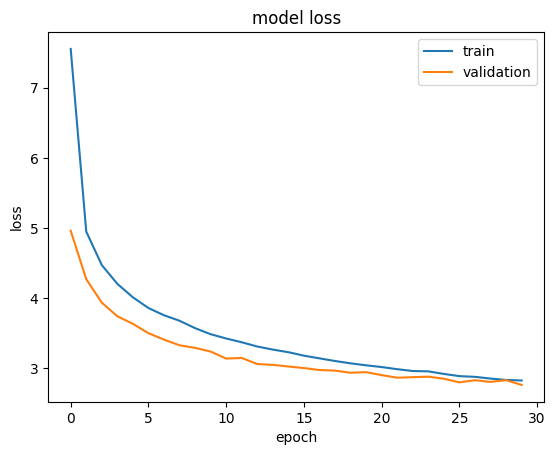

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 100, 12)]    0           []                               
                                                                                                  
 batch_normalization (BatchNorm  (None, 100, 12)     48          ['input_1[0][0]']                
 alization)                                                                                       
                                                                                                  
 bidirectional (Bidirectional)  (None, 100, 256)     109056      ['batch_normalization[0][0]']    
                                                                                                  
 dropout (Dropout)              (None, 100, 256)     0           ['bidirectional[0][0]']      

In [ ]:
#### Main Model ####

inputs_1D = tf.keras.layers.Input( shape=(w,12) )
inputs_2D = tf.keras.layers.Input( shape=(w,6,2) )


inputs_1D_N=BatchNormalization()(inputs_1D)
inputs_2D_N=BatchNormalization()(inputs_2D)


output=GRU_Net(inputs_1D_N,inputs_2D_N)

model = Model(inputs=[inputs_1D, inputs_2D], outputs=output)
model.compile(loss=correlation_coefficient_loss_RMSE, optimizer='Adam')


history=model.fit([np.array(train_X_1D),np.array(train_X_2D)], train_y_5, epochs=30, batch_size=64, validation_data=([X_validation_1D,\
                                                                      X_validation_2D], Y_validation), verbose=2, shuffle=False)

filename = path+'model_GRU.h5'
model.save(filename)
print('>Saved %s' % filename)

# # # summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()
model.summary()


In [ ]:
gc.collect()
gc.collect()
gc.collect()
gc.collect()

0

In [ ]:
model_path = path+'model_GRU.h5'

model=load_model(model_path, custom_objects={'correlation_coefficient_loss_RMSE': correlation_coefficient_loss_RMSE})

yhat_4=model.predict([test_X_1D,test_X_2D])


 ### Present ###
yhat_5=yhat_4.reshape((yhat_4.shape[0]*w,6))
test_y_r=test_y.reshape((test_y.shape[0]*w,6))

print(yhat_4.shape)


### Unpack ###
yhat_up=unpack_dataset_present(np.array(yhat_5))
test_y_up=unpack_dataset_present(np.array(test_y_r))

print(yhat_up.shape,test_y_up.shape)

### Present ###

yhat_up=yhat_up.reshape(int(len(yhat_up)/6),6)
test_y_up=test_y_up.reshape(int(len(test_y_up)/6),6)

print(yhat_up.shape,test_y_up.shape)

105/105 [==============================] - 2s 7ms/step
(3358, 600)
(1007400,) (1007400,)
(167900, 6) (167900, 6)


In [ ]:
### Present ###

rmse,p= prediction_test(np.array(yhat_up),np.array(test_y_up))

print(rmse[0])
print(rmse[1])
print(rmse[2])

m=np.mean(rmse)

print('\n')
print(m)

print('\n')

print(p[0])
print(p[1])
print(p[2])
print('\n')

print(np.mean(p))

4.571996222629288
5.545616212535245
3.5060286621706247


4.54121369911172


0.9651133323902967
0.9720989241287741
0.9291499121063873


0.955454056208486


In [ ]:
RMSE_GRU=rmse
PCC_GRU=p

Ablation_1=np.hstack([RMSE_GRU,PCC_GRU])

## 2. Conv1D-Net

In [ ]:
def Conv1D_Net(inputs_1D_N,inputs_2D_N):

  CNN=Conv1D(filters=64, kernel_size=3, activation='relu',padding='same')(inputs_1D_N)
  CNN=Conv1D(filters=64, kernel_size=3, activation='relu',padding='same')(CNN)
  CNN=BatchNormalization()(CNN)
  CNN=MaxPooling1D(pool_size=2)(CNN)
  CNN=Conv1D(filters=128, kernel_size=3, activation='relu',padding='same')(CNN)
  CNN=Conv1D(filters=128, kernel_size=3, activation='relu',padding='same')(CNN)
  CNN=BatchNormalization()(CNN)
  CNN=MaxPooling1D(pool_size=2)(CNN)

  CNN=Dense(64, activation='relu')(CNN)
  CNN=Dropout(0.2)(CNN)
  CNN=Dense(32, activation='relu')(CNN)
  CNN=Dropout(0.2)(CNN)

  CNN=Flatten()(CNN)

  output_C1=Dense(6*w,bias_regularizer=l2(0.001), activation='linear')(CNN)


  return output_C1

Epoch 1/30
401/401 - 13s - loss: 8.4400 - val_loss: 7.6579 - 13s/epoch - 32ms/step
Epoch 2/30
401/401 - 3s - loss: 5.7409 - val_loss: 5.2536 - 3s/epoch - 7ms/step
Epoch 3/30
401/401 - 3s - loss: 5.2726 - val_loss: 4.8279 - 3s/epoch - 7ms/step
Epoch 4/30
401/401 - 3s - loss: 5.0033 - val_loss: 4.5730 - 3s/epoch - 7ms/step
Epoch 5/30
401/401 - 3s - loss: 4.8343 - val_loss: 4.3801 - 3s/epoch - 7ms/step
Epoch 6/30
401/401 - 3s - loss: 4.7083 - val_loss: 4.2834 - 3s/epoch - 7ms/step
Epoch 7/30
401/401 - 3s - loss: 4.6127 - val_loss: 4.4465 - 3s/epoch - 7ms/step
Epoch 8/30
401/401 - 3s - loss: 4.5215 - val_loss: 4.1336 - 3s/epoch - 7ms/step
Epoch 9/30
401/401 - 3s - loss: 4.4632 - val_loss: 4.1333 - 3s/epoch - 7ms/step
Epoch 10/30
401/401 - 3s - loss: 4.4035 - val_loss: 4.0269 - 3s/epoch - 7ms/step
Epoch 11/30
401/401 - 3s - loss: 4.3570 - val_loss: 3.9449 - 3s/epoch - 7ms/step
Epoch 12/30
401/401 - 3s - loss: 4.3139 - val_loss: 3.9200 - 3s/epoch - 7ms/step
Epoch 13/30
401/401 - 3s - loss: 4

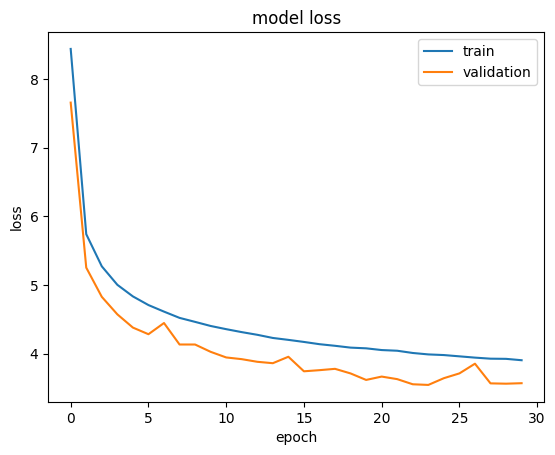

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 100, 12)]    0           []                               
                                                                                                  
 batch_normalization_2 (BatchNo  (None, 100, 12)     48          ['input_3[0][0]']                
 rmalization)                                                                                     
                                                                                                  
 conv1d (Conv1D)                (None, 100, 64)      2368        ['batch_normalization_2[0][0]']  
                                                                                                  
 conv1d_1 (Conv1D)              (None, 100, 64)      12352       ['conv1d[0][0]']           

In [ ]:
#### Main Model ####

inputs_1D = tf.keras.layers.Input( shape=(w,12) )
inputs_2D = tf.keras.layers.Input( shape=(w,6,2) )

inputs_1D_N=BatchNormalization()(inputs_1D)
inputs_2D_N=BatchNormalization()(inputs_2D)

output=Conv1D_Net(inputs_1D_N,inputs_2D_N)

model = Model(inputs=[inputs_1D, inputs_2D], outputs=output)
model.compile(loss=correlation_coefficient_loss_RMSE, optimizer='Adam')


history=model.fit([np.array(train_X_1D),np.array(train_X_2D)], train_y_5, epochs=30, batch_size=64, validation_data=([X_validation_1D,\
                                                                      X_validation_2D], Y_validation), verbose=2, shuffle=False)

filename = path+'model_Conv1D.h5'
model.save(filename)
print('>Saved %s' % filename)

# # # summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()
model.summary()


In [ ]:
gc.collect()
gc.collect()
gc.collect()
gc.collect()

0

In [ ]:
model_path = path+'model_Conv1D.h5'

model=load_model(model_path, custom_objects={'correlation_coefficient_loss_RMSE': correlation_coefficient_loss_RMSE})

yhat_4=model.predict([test_X_1D,test_X_2D])


 ### Present ###
yhat_5=yhat_4.reshape((yhat_4.shape[0]*w,6))
test_y_r=test_y.reshape((test_y.shape[0]*w,6))

print(yhat_4.shape)


### Unpack ###
yhat_up=unpack_dataset_present(np.array(yhat_5))
test_y_up=unpack_dataset_present(np.array(test_y_r))

print(yhat_up.shape,test_y_up.shape)

### Present ###

yhat_up=yhat_up.reshape(int(len(yhat_up)/6),6)
test_y_up=test_y_up.reshape(int(len(test_y_up)/6),6)

print(yhat_up.shape,test_y_up.shape)

105/105 [==============================] - 1s 3ms/step
(3358, 600)
(1007400,) (1007400,)
(167900, 6) (167900, 6)


In [ ]:
### Present ###

rmse,p= prediction_test(np.array(yhat_up),np.array(test_y_up))

print(rmse[0])
print(rmse[1])
print(rmse[2])

m=np.mean(rmse)

print('\n')
print(m)

print('\n')

print(p[0])
print(p[1])
print(p[2])
print('\n')

print(np.mean(p))

4.983082409153208
6.605732296752542
3.697174322588719


5.095329676164823


0.9602144046775346
0.9647246997003717
0.9180526432218564


0.9476639158665875


In [ ]:
RMSE_Conv1D=rmse
PCC_Conv1D=p

Ablation_2=np.hstack([RMSE_Conv1D,PCC_Conv1D])

## 3. Conv2D-Net

In [ ]:
def Conv2D_Net(inputs_1D_N,inputs_2D_N):

  X=Conv2D(64, (3, 3), activation='relu',padding='same')(inputs_2D_N)
  X=BatchNormalization()(X)
  X=MaxPooling2D((2, 2))(X)
  X=Conv2D(128, (3, 3), activation='relu', padding='same')(X)
  X=BatchNormalization()(X)
  X=MaxPooling2D((2, 2))(X)
  X=Dense(64, activation='relu')(X)

  X=Dropout(0.2)(X)
  X=Dense(32,activation='relu')(X)
  X=Dropout(0.2)(X)

  X=Flatten()(X)
  output_C2=Dense(6*w,bias_regularizer=l2(0.001), activation='linear')(X)


  return output_C2

Epoch 1/30
401/401 - 7s - loss: 9.3482 - val_loss: 11.4086 - 7s/epoch - 16ms/step
Epoch 2/30
401/401 - 3s - loss: 6.9338 - val_loss: 6.5002 - 3s/epoch - 7ms/step
Epoch 3/30
401/401 - 3s - loss: 6.4474 - val_loss: 6.2569 - 3s/epoch - 8ms/step
Epoch 4/30
401/401 - 4s - loss: 6.1745 - val_loss: 6.0261 - 4s/epoch - 9ms/step
Epoch 5/30
401/401 - 4s - loss: 5.9876 - val_loss: 5.8580 - 4s/epoch - 9ms/step
Epoch 6/30
401/401 - 3s - loss: 5.8783 - val_loss: 5.8908 - 3s/epoch - 8ms/step
Epoch 7/30
401/401 - 3s - loss: 5.7452 - val_loss: 5.3611 - 3s/epoch - 7ms/step
Epoch 8/30
401/401 - 3s - loss: 5.6679 - val_loss: 5.6115 - 3s/epoch - 7ms/step
Epoch 9/30
401/401 - 3s - loss: 5.5906 - val_loss: 5.5190 - 3s/epoch - 7ms/step
Epoch 10/30
401/401 - 3s - loss: 5.5257 - val_loss: 5.6165 - 3s/epoch - 7ms/step
Epoch 11/30
401/401 - 3s - loss: 5.4757 - val_loss: 5.4285 - 3s/epoch - 7ms/step
Epoch 12/30
401/401 - 3s - loss: 5.4106 - val_loss: 5.1446 - 3s/epoch - 7ms/step
Epoch 13/30
401/401 - 3s - loss: 5.

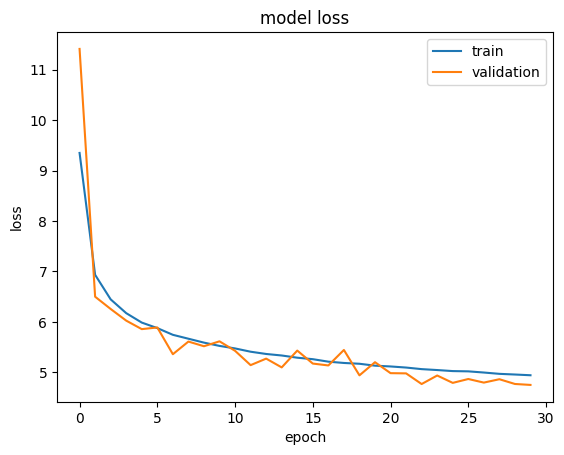

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None, 100, 6, 2)]  0           []                               
                                                                                                  
 batch_normalization_7 (BatchNo  (None, 100, 6, 2)   8           ['input_6[0][0]']                
 rmalization)                                                                                     
                                                                                                  
 conv2d (Conv2D)                (None, 100, 6, 64)   1216        ['batch_normalization_7[0][0]']  
                                                                                                  
 batch_normalization_8 (BatchNo  (None, 100, 6, 64)  256         ['conv2d[0][0]']           

In [ ]:
#### Main Model ####

inputs_1D = tf.keras.layers.Input( shape=(w,12) )
inputs_2D = tf.keras.layers.Input( shape=(w,6,2) )


inputs_1D_N=BatchNormalization()(inputs_1D)
inputs_2D_N=BatchNormalization()(inputs_2D)


output=Conv2D_Net(inputs_1D_N,inputs_2D_N)

model = Model(inputs=[inputs_1D, inputs_2D], outputs=output)
model.compile(loss=correlation_coefficient_loss_RMSE, optimizer='Adam')


history=model.fit([np.array(train_X_1D),np.array(train_X_2D)], train_y_5, epochs=30, batch_size=64, validation_data=([X_validation_1D,\
                                                                      X_validation_2D], Y_validation), verbose=2, shuffle=False)

filename = path+'model_Conv2D.h5'
model.save(filename)
print('>Saved %s' % filename)

# # # summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()
model.summary()


In [ ]:
gc.collect()
gc.collect()
gc.collect()
gc.collect()

0

In [ ]:
model_path = path+'model_Conv2D.h5'

model=load_model(model_path, custom_objects={'correlation_coefficient_loss_RMSE': correlation_coefficient_loss_RMSE})

yhat_4=model.predict([test_X_1D,test_X_2D])


 ### Present ###
yhat_5=yhat_4.reshape((yhat_4.shape[0]*w,6))
test_y_r=test_y.reshape((test_y.shape[0]*w,6))

print(yhat_4.shape)


### Unpack ###
yhat_up=unpack_dataset_present(np.array(yhat_5))
test_y_up=unpack_dataset_present(np.array(test_y_r))

print(yhat_up.shape,test_y_up.shape)

### Present ###

yhat_up=yhat_up.reshape(int(len(yhat_up)/6),6)
test_y_up=test_y_up.reshape(int(len(test_y_up)/6),6)

print(yhat_up.shape,test_y_up.shape)

105/105 [==============================] - 1s 3ms/step
(3358, 600)
(1007400,) (1007400,)
(167900, 6) (167900, 6)


In [ ]:
### Present ###

rmse,p= prediction_test(np.array(yhat_up),np.array(test_y_up))

print(rmse[0])
print(rmse[1])
print(rmse[2])

m=np.mean(rmse)

print('\n')
print(m)

print('\n')

print(p[0])
print(p[1])
print(p[2])
print('\n')

print(np.mean(p))

5.31328216378651
6.98931070480695
4.657402956616253


5.653331941736571


0.9513436191930913
0.9601247979923256
0.9004171188640064


0.9372951786831413


In [ ]:
RMSE_Conv2D=rmse
PCC_Conv2D=p

Ablation_3=np.hstack([RMSE_Conv2D,PCC_Conv2D])

##4. GRU-Conv1D-Net

In [ ]:
def GRU_Conv1D_Net(inputs_1D_N,inputs_2D_N):

  model_3=Bidirectional(GRU(128,return_sequences=True))(inputs_1D_N)
  model_3=Dropout(0.4)(model_3)
  model_3=Bidirectional(GRU(64,return_sequences=True))(model_3)
  model_3=Dropout(0.4)(model_3)
  model_3=Flatten()(model_3)

  CNN=Conv1D(filters=64, kernel_size=3, activation='relu',padding='same')(inputs_1D_N)
  CNN=Conv1D(filters=64, kernel_size=3, activation='relu',padding='same')(CNN)
  CNN=BatchNormalization()(CNN)
  CNN=MaxPooling1D(pool_size=2)(CNN)
  CNN=Conv1D(filters=128, kernel_size=3, activation='relu',padding='same')(CNN)
  CNN=Conv1D(filters=128, kernel_size=3, activation='relu',padding='same')(CNN)
  CNN=BatchNormalization()(CNN)
  CNN=MaxPooling1D(pool_size=2)(CNN)


  CNN=Dense(64, activation='relu')(CNN)
  CNN=Dropout(0.2)(CNN)
  CNN=Dense(32, activation='relu')(CNN)
  CNN=Dropout(0.2)(CNN)

  CNN_1=Flatten()(CNN)
  CNN= concatenate([model_3,CNN_1])

  output_C1=Dense(6*w,bias_regularizer=l2(0.001), activation='linear')(CNN)


  return output_C1

Epoch 1/30
401/401 - 20s - loss: 6.7961 - val_loss: 6.5937 - 20s/epoch - 50ms/step
Epoch 2/30
401/401 - 9s - loss: 4.7496 - val_loss: 4.4259 - 9s/epoch - 24ms/step
Epoch 3/30
401/401 - 10s - loss: 4.2852 - val_loss: 4.0158 - 10s/epoch - 24ms/step
Epoch 4/30
401/401 - 9s - loss: 4.0053 - val_loss: 3.7512 - 9s/epoch - 24ms/step
Epoch 5/30
401/401 - 9s - loss: 3.8132 - val_loss: 3.6806 - 9s/epoch - 24ms/step
Epoch 6/30
401/401 - 10s - loss: 3.6712 - val_loss: 3.4728 - 10s/epoch - 24ms/step
Epoch 7/30
401/401 - 9s - loss: 3.5618 - val_loss: 3.3165 - 9s/epoch - 24ms/step
Epoch 8/30
401/401 - 9s - loss: 3.4650 - val_loss: 3.3164 - 9s/epoch - 23ms/step
Epoch 9/30
401/401 - 9s - loss: 3.4133 - val_loss: 3.2735 - 9s/epoch - 23ms/step
Epoch 10/30
401/401 - 9s - loss: 3.3235 - val_loss: 3.2157 - 9s/epoch - 23ms/step
Epoch 11/30
401/401 - 9s - loss: 3.2561 - val_loss: 3.1532 - 9s/epoch - 23ms/step
Epoch 12/30
401/401 - 9s - loss: 3.2015 - val_loss: 3.1768 - 9s/epoch - 23ms/step
Epoch 13/30
401/401

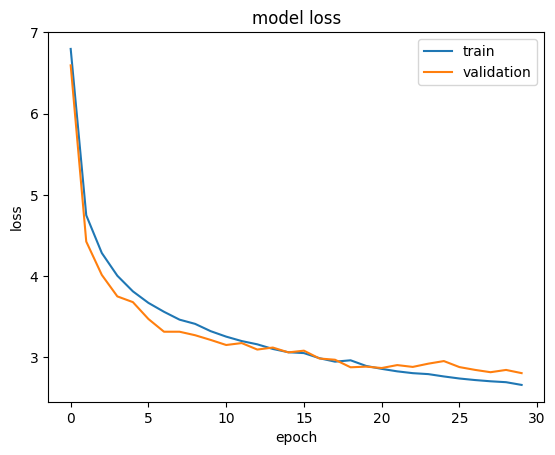

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(None, 100, 12)]    0           []                               
                                                                                                  
 batch_normalization_10 (BatchN  (None, 100, 12)     48          ['input_7[0][0]']                
 ormalization)                                                                                    
                                                                                                  
 conv1d_4 (Conv1D)              (None, 100, 64)      2368        ['batch_normalization_10[0][0]'] 
                                                                                                  
 conv1d_5 (Conv1D)              (None, 100, 64)      12352       ['conv1d_4[0][0]']         

In [ ]:
#### Main Model ####

inputs_1D = tf.keras.layers.Input( shape=(w,12) )
inputs_2D = tf.keras.layers.Input( shape=(w,6,2) )

inputs_1D_N=BatchNormalization()(inputs_1D)
inputs_2D_N=BatchNormalization()(inputs_2D)

output=GRU_Conv1D_Net(inputs_1D_N,inputs_2D_N)

model = Model(inputs=[inputs_1D, inputs_2D], outputs=output)
model.compile(loss=correlation_coefficient_loss_RMSE, optimizer='Adam')


history=model.fit([np.array(train_X_1D),np.array(train_X_2D)], train_y_5, epochs=30, batch_size=64, validation_data=([X_validation_1D,\
                                                                      X_validation_2D], Y_validation), verbose=2, shuffle=False)

filename = path+'model_GRU_Conv1D.h5'
model.save(filename)
print('>Saved %s' % filename)

# # # summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()
model.summary()


In [ ]:
gc.collect()
gc.collect()
gc.collect()
gc.collect()

0

In [ ]:
model_path = path+'model_GRU_Conv1D.h5'
model=load_model(model_path, custom_objects={'correlation_coefficient_loss_RMSE': correlation_coefficient_loss_RMSE})


yhat_4=model.predict([test_X_1D,test_X_2D])


 ### Present ###
yhat_5=yhat_4.reshape((yhat_4.shape[0]*w,6))
test_y_r=test_y.reshape((test_y.shape[0]*w,6))

print(yhat_4.shape)


### Unpack ###
yhat_up=unpack_dataset_present(np.array(yhat_5))
test_y_up=unpack_dataset_present(np.array(test_y_r))

print(yhat_up.shape,test_y_up.shape)

### Present ###

yhat_up=yhat_up.reshape(int(len(yhat_up)/6),6)
test_y_up=test_y_up.reshape(int(len(test_y_up)/6),6)

print(yhat_up.shape,test_y_up.shape)

105/105 [==============================] - 2s 9ms/step
(3358, 600)
(1007400,) (1007400,)
(167900, 6) (167900, 6)


In [ ]:
### Present ###

rmse,p= prediction_test(np.array(yhat_up),np.array(test_y_up))

print(rmse[0])
print(rmse[1])
print(rmse[2])

m=np.mean(rmse)

print('\n')
print(m)

print('\n')

print(p[0])
print(p[1])
print(p[2])
print('\n')

print(np.mean(p))

4.650838209101936
5.704855337178913
3.2419291150556084


4.532540887112153


0.9628358122143263
0.9736335871843904
0.936185673566208


0.9575516909883083


In [ ]:
RMSE_GRU_Conv1D=rmse
PCC_GRU_Conv1D=p

Ablation_4=np.hstack([RMSE_GRU_Conv1D,PCC_GRU_Conv1D])

##5. GRU-Conv2D-Net

In [ ]:
def GRU_Conv2D_Net(inputs_1D_N,inputs_2D_N):

  model_2=Bidirectional(GRU(128,return_sequences=True))(inputs_1D_N)
  model_2=Dropout(0.4)(model_2)
  model_2=Bidirectional(GRU(64,return_sequences=True))(model_2)
  model_2=Dropout(0.4)(model_2)
  model_2=Flatten()(model_2)

  X=Conv2D(64, (3, 3), activation='relu',padding='same')(inputs_2D_N)
  X=BatchNormalization()(X)
  X=MaxPooling2D((2, 2))(X)
  X=Conv2D(128, (3, 3), activation='relu', padding='same')(X)
  X=BatchNormalization()(X)
  X=MaxPooling2D((2, 2))(X)

  X=Dense(64, activation='relu')(X)
  X=Dropout(0.2)(X)
  X=Dense(32,activation='relu')(X)
  X=Dropout(0.2)(X)

  X_1=Flatten()(X)
  X= concatenate([model_2,X_1])

  output_C2=Dense(6*w,bias_regularizer=l2(0.001), activation='linear')(X)


  return output_C2

Epoch 1/30
401/401 - 20s - loss: 6.8746 - val_loss: 5.8746 - 20s/epoch - 49ms/step
Epoch 2/30
401/401 - 10s - loss: 4.7984 - val_loss: 4.1823 - 10s/epoch - 25ms/step
Epoch 3/30
401/401 - 10s - loss: 4.3473 - val_loss: 3.9270 - 10s/epoch - 25ms/step
Epoch 4/30
401/401 - 10s - loss: 4.0803 - val_loss: 3.6855 - 10s/epoch - 25ms/step
Epoch 5/30
401/401 - 10s - loss: 3.9202 - val_loss: 3.6093 - 10s/epoch - 25ms/step
Epoch 6/30
401/401 - 10s - loss: 3.7559 - val_loss: 3.4858 - 10s/epoch - 25ms/step
Epoch 7/30
401/401 - 10s - loss: 3.6595 - val_loss: 3.3636 - 10s/epoch - 24ms/step
Epoch 8/30
401/401 - 10s - loss: 3.5582 - val_loss: 3.3068 - 10s/epoch - 24ms/step
Epoch 9/30
401/401 - 10s - loss: 3.4763 - val_loss: 3.2931 - 10s/epoch - 24ms/step
Epoch 10/30
401/401 - 10s - loss: 3.4130 - val_loss: 3.2654 - 10s/epoch - 25ms/step
Epoch 11/30
401/401 - 10s - loss: 3.3571 - val_loss: 3.2633 - 10s/epoch - 26ms/step
Epoch 12/30
401/401 - 10s - loss: 3.3069 - val_loss: 3.1849 - 10s/epoch - 26ms/step
E

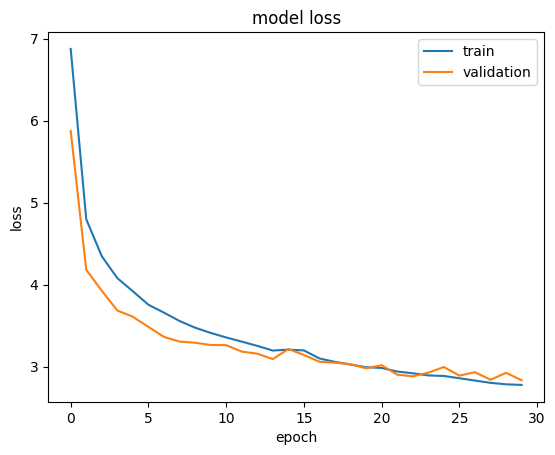

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_10 (InputLayer)          [(None, 100, 6, 2)]  0           []                               
                                                                                                  
 batch_normalization_15 (BatchN  (None, 100, 6, 2)   8           ['input_10[0][0]']               
 ormalization)                                                                                    
                                                                                                  
 conv2d_2 (Conv2D)              (None, 100, 6, 64)   1216        ['batch_normalization_15[0][0]'] 
                                                                                                  
 batch_normalization_16 (BatchN  (None, 100, 6, 64)  256         ['conv2d_2[0][0]']         

In [ ]:
#### Main Model ####

inputs_1D = tf.keras.layers.Input( shape=(w,12) )
inputs_2D = tf.keras.layers.Input( shape=(w,6,2) )


inputs_1D_N=BatchNormalization()(inputs_1D)
inputs_2D_N=BatchNormalization()(inputs_2D)


output=GRU_Conv2D_Net(inputs_1D_N,inputs_2D_N)

model = Model(inputs=[inputs_1D, inputs_2D], outputs=output)
model.compile(loss=correlation_coefficient_loss_RMSE, optimizer='Adam')


history=model.fit([np.array(train_X_1D),np.array(train_X_2D)], train_y_5, epochs=30, batch_size=64, validation_data=([X_validation_1D,\
                                                                      X_validation_2D], Y_validation), verbose=2, shuffle=False)

filename = path+'model_GRU_Conv2D.h5'
model.save(filename)
print('>Saved %s' % filename)

# # # summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()
model.summary()


In [ ]:
gc.collect()
gc.collect()
gc.collect()
gc.collect()

0

In [ ]:
model_path = path+'model_GRU_Conv2D.h5'
model=load_model(model_path, custom_objects={'correlation_coefficient_loss_RMSE': correlation_coefficient_loss_RMSE})

yhat_4=model.predict([test_X_1D,test_X_2D])


 ### Present ###
yhat_5=yhat_4.reshape((yhat_4.shape[0]*w,6))
test_y_r=test_y.reshape((test_y.shape[0]*w,6))

print(yhat_4.shape)


### Unpack ###
yhat_up=unpack_dataset_present(np.array(yhat_5))
test_y_up=unpack_dataset_present(np.array(test_y_r))

print(yhat_up.shape,test_y_up.shape)

### Present ###

yhat_up=yhat_up.reshape(int(len(yhat_up)/6),6)
test_y_up=test_y_up.reshape(int(len(test_y_up)/6),6)

print(yhat_up.shape,test_y_up.shape)

105/105 [==============================] - 2s 9ms/step
(3358, 600)
(1007400,) (1007400,)
(167900, 6) (167900, 6)


In [ ]:
### Present ###

rmse,p= prediction_test(np.array(yhat_up),np.array(test_y_up))

print(rmse[0])
print(rmse[1])
print(rmse[2])

m=np.mean(rmse)

print('\n')
print(m)

print('\n')

print(p[0])
print(p[1])
print(p[2])
print('\n')

print(np.mean(p))

4.69147806277033
5.576131457453798
3.1685020459262927


4.478703855383473


0.9642629551191422
0.9738648433214695
0.9402385448094925


0.9594554477500347


In [ ]:
RMSE_GRU_Conv2D=rmse
PCC_GRU_Conv2D=p

Ablation_5=np.hstack([RMSE_GRU_Conv2D,PCC_GRU_Conv2D])

##6. Conv1D-Conv2D-Net

In [ ]:
def Conv1D_Conv2D_Net(inputs_1D_N,inputs_2D_N):

  X=Conv2D(64, (3, 3), activation='relu',padding='same')(inputs_2D_N)
  X=BatchNormalization()(X)
  X=MaxPooling2D((2, 2))(X)
  X=Conv2D(128, (3, 3), activation='relu', padding='same')(X)
  X=BatchNormalization()(X)
  X=MaxPooling2D((2, 2))(X)

  X=Dense(64, activation='relu')(X)
  X=Dropout(0.2)(X)
  X=Dense(32,activation='relu')(X)
  X=Dropout(0.2)(X)
  X_1=Flatten()(X)

  CNN=Conv1D(filters=64, kernel_size=3, activation='relu',padding='same')(inputs_1D_N)
  CNN=Conv1D(filters=64, kernel_size=3, activation='relu',padding='same')(CNN)
  CNN=BatchNormalization()(CNN)
  CNN=MaxPooling1D(pool_size=2)(CNN)
  CNN=Conv1D(filters=128, kernel_size=3, activation='relu',padding='same')(CNN)
  CNN=Conv1D(filters=128, kernel_size=3, activation='relu',padding='same')(CNN)
  CNN=BatchNormalization()(CNN)
  CNN=MaxPooling1D(pool_size=2)(CNN)
  CNN=Dense(64, activation='relu')(CNN)
  CNN=Dropout(0.2)(CNN)
  CNN=Dense(32, activation='relu')(CNN)
  CNN=Dropout(0.2)(CNN)
  CNN_1=Flatten()(CNN)

  CNN= concatenate([X_1,CNN_1])
  output_C1=Dense(6*w,bias_regularizer=l2(0.001), activation='linear')(CNN)


  return output_C1

Epoch 1/30
401/401 - 12s - loss: 7.5460 - val_loss: 8.4423 - 12s/epoch - 31ms/step
Epoch 2/30
401/401 - 5s - loss: 5.2827 - val_loss: 4.7175 - 5s/epoch - 11ms/step
Epoch 3/30
401/401 - 4s - loss: 4.8397 - val_loss: 4.4380 - 4s/epoch - 11ms/step
Epoch 4/30
401/401 - 6s - loss: 4.5877 - val_loss: 4.4069 - 6s/epoch - 14ms/step
Epoch 5/30
401/401 - 5s - loss: 4.4246 - val_loss: 4.0440 - 5s/epoch - 13ms/step
Epoch 6/30
401/401 - 6s - loss: 4.2766 - val_loss: 4.0621 - 6s/epoch - 14ms/step
Epoch 7/30
401/401 - 6s - loss: 4.1699 - val_loss: 4.0232 - 6s/epoch - 14ms/step
Epoch 8/30
401/401 - 6s - loss: 4.1032 - val_loss: 3.7818 - 6s/epoch - 14ms/step
Epoch 9/30
401/401 - 5s - loss: 4.0370 - val_loss: 4.0986 - 5s/epoch - 12ms/step
Epoch 10/30
401/401 - 5s - loss: 3.9627 - val_loss: 3.8095 - 5s/epoch - 11ms/step
Epoch 11/30
401/401 - 5s - loss: 3.9103 - val_loss: 3.7835 - 5s/epoch - 14ms/step
Epoch 12/30
401/401 - 6s - loss: 3.8712 - val_loss: 3.6717 - 6s/epoch - 14ms/step
Epoch 13/30
401/401 - 5

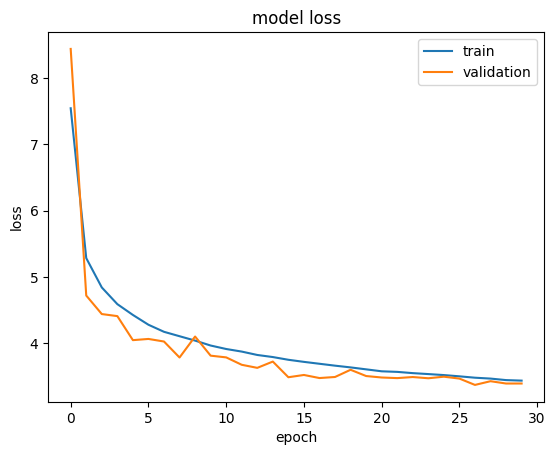

Model: "model_7"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_15 (InputLayer)          [(None, 100, 12)]    0           []                               
                                                                                                  
 batch_normalization_30 (BatchN  (None, 100, 12)     48          ['input_15[0][0]']               
 ormalization)                                                                                    
                                                                                                  
 input_16 (InputLayer)          [(None, 100, 6, 2)]  0           []                               
                                                                                                  
 conv1d_16 (Conv1D)             (None, 100, 64)      2368        ['batch_normalization_30[0]

In [ ]:
#### Main Model ####

inputs_1D = tf.keras.layers.Input( shape=(w,12) )
inputs_2D = tf.keras.layers.Input( shape=(w,6,2) )


inputs_1D_N=BatchNormalization()(inputs_1D)
inputs_2D_N=BatchNormalization()(inputs_2D)


output=Conv1D_Conv2D_Net(inputs_1D_N,inputs_2D_N)

model = Model(inputs=[inputs_1D, inputs_2D], outputs=output)
model.compile(loss=correlation_coefficient_loss_RMSE, optimizer='Adam')


history=model.fit([np.array(train_X_1D),np.array(train_X_2D)], train_y_5, epochs=30, batch_size=64, validation_data=([X_validation_1D,\
                                                                      X_validation_2D], Y_validation), verbose=2, shuffle=False)

filename = path+'model_Conv1D_Conv2D.h5'
model.save(filename)
print('>Saved %s' % filename)

# # # summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()
model.summary()


In [ ]:
gc.collect()
gc.collect()
gc.collect()
gc.collect()

0

In [ ]:
model_path = path+'model_Conv1D_Conv2D.h5'
model=load_model(model_path, custom_objects={'correlation_coefficient_loss_RMSE': correlation_coefficient_loss_RMSE})

yhat_4=model.predict([test_X_1D,test_X_2D])


 ### Present ###
yhat_5=yhat_4.reshape((yhat_4.shape[0]*w,6))
test_y_r=test_y.reshape((test_y.shape[0]*w,6))

print(yhat_4.shape)


### Unpack ###
yhat_up=unpack_dataset_present(np.array(yhat_5))
test_y_up=unpack_dataset_present(np.array(test_y_r))

print(yhat_up.shape,test_y_up.shape)

### Present ###

yhat_up=yhat_up.reshape(int(len(yhat_up)/6),6)
test_y_up=test_y_up.reshape(int(len(test_y_up)/6),6)

print(yhat_up.shape,test_y_up.shape)

105/105 [==============================] - 1s 6ms/step
(3358, 600)
(1007400,) (1007400,)
(167900, 6) (167900, 6)


In [ ]:
### Present ###

rmse,p= prediction_test(np.array(yhat_up),np.array(test_y_up))

print(rmse[0])
print(rmse[1])
print(rmse[2])

m=np.mean(rmse)

print('\n')
print(m)

print('\n')

print(p[0])
print(p[1])
print(p[2])
print('\n')

print(np.mean(p))

4.768155576925212
6.5666589382356575
3.62100036889722


4.985271628019363


0.9611569558305513
0.9669597415662672
0.9233841849619326


0.9505002941195837


In [ ]:
RMSE_Conv1D_Conv2D=rmse
PCC_Conv1D_Conv2D=p

Ablation_6=np.hstack([RMSE_Conv1D_Conv2D,PCC_Conv1D_Conv2D])

##7. Gait-SubNet-1

In [ ]:
def Gait_SubNet_1(inputs_1D_N,inputs_2D_N):

  model_1=Bidirectional(GRU(128,return_sequences=True))(inputs_1D_N)
  model_1=Dropout(0.4)(model_1)
  model_1=Bidirectional(GRU(64,return_sequences=True))(model_1)
  model_1=Dropout(0.4)(model_1)
  model_1=Flatten()(model_1)

  model_3=Bidirectional(GRU(128,return_sequences=True))(inputs_1D_N)
  model_3=Dropout(0.4)(model_3)
  model_3=Bidirectional(GRU(64,return_sequences=True))(model_3)
  model_3=Dropout(0.4)(model_3)
  model_3=Flatten()(model_3)

  CNN=Conv1D(filters=64, kernel_size=3, activation='relu',padding='same')(inputs_1D_N)
  CNN=Conv1D(filters=64, kernel_size=3, activation='relu',padding='same')(CNN)
  CNN=BatchNormalization()(CNN)
  CNN=MaxPooling1D(pool_size=2)(CNN)
  CNN=Conv1D(filters=128, kernel_size=3, activation='relu',padding='same')(CNN)
  CNN=Conv1D(filters=128, kernel_size=3, activation='relu',padding='same')(CNN)
  CNN=BatchNormalization()(CNN)
  CNN=MaxPooling1D(pool_size=2)(CNN)

  CNN=Dense(64, activation='relu')(CNN)
  CNN=Dropout(0.2)(CNN)
  CNN=Dense(32, activation='relu')(CNN)
  CNN=Dropout(0.2)(CNN)
  CNN_1=Flatten()(CNN)
  CNN= concatenate([model_3,CNN_1])

  output_GRU=Dense(6*w,bias_regularizer=l2(0.001), activation='linear')(model_1)
  output_C1=Dense(6*w,bias_regularizer=l2(0.001), activation='linear')(CNN)

  output = Average()([output_GRU,output_C1])


  return (output_GRU,output_C1,output)

Epoch 1/30
401/401 - 37s - loss: 21.1356 - dense_32_loss: 7.4605 - dense_33_loss: 6.8784 - average_1_loss: 6.7965 - val_loss: 16.8044 - val_dense_32_loss: 5.0144 - val_dense_33_loss: 6.4930 - val_average_1_loss: 5.2968 - 37s/epoch - 92ms/step
Epoch 2/30
401/401 - 17s - loss: 14.1703 - dense_32_loss: 4.9570 - dense_33_loss: 4.7341 - average_1_loss: 4.4791 - val_loss: 12.4592 - val_dense_32_loss: 4.2685 - val_dense_33_loss: 4.2062 - val_average_1_loss: 3.9844 - 17s/epoch - 43ms/step
Epoch 3/30
401/401 - 17s - loss: 12.7487 - dense_32_loss: 4.4841 - dense_33_loss: 4.2691 - average_1_loss: 3.9954 - val_loss: 11.4183 - val_dense_32_loss: 3.9280 - val_dense_33_loss: 3.8465 - val_average_1_loss: 3.6438 - 17s/epoch - 43ms/step
Epoch 4/30
401/401 - 19s - loss: 11.9636 - dense_32_loss: 4.2194 - dense_33_loss: 4.0173 - average_1_loss: 3.7268 - val_loss: 10.9333 - val_dense_32_loss: 3.7455 - val_dense_33_loss: 3.7097 - val_average_1_loss: 3.4781 - 19s/epoch - 47ms/step
Epoch 5/30
401/401 - 18s - l

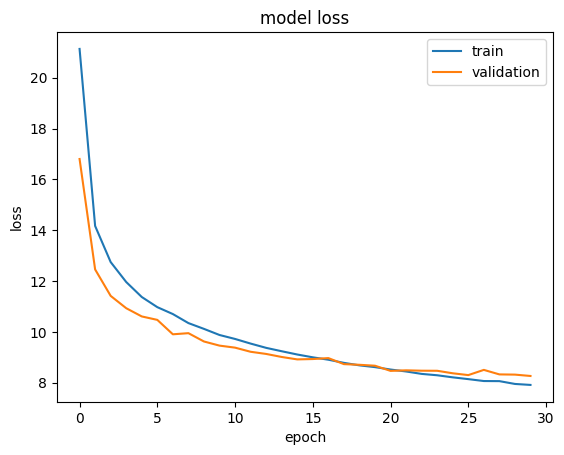

Model: "model_8"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_17 (InputLayer)          [(None, 100, 12)]    0           []                               
                                                                                                  
 batch_normalization_36 (BatchN  (None, 100, 12)     48          ['input_17[0][0]']               
 ormalization)                                                                                    
                                                                                                  
 conv1d_20 (Conv1D)             (None, 100, 64)      2368        ['batch_normalization_36[0][0]'] 
                                                                                                  
 conv1d_21 (Conv1D)             (None, 100, 64)      12352       ['conv1d_20[0][0]']        

In [ ]:
#### Main Model ####

inputs_1D = tf.keras.layers.Input( shape=(w,12) )
inputs_2D = tf.keras.layers.Input( shape=(w,6,2) )


inputs_1D_N=BatchNormalization()(inputs_1D)
inputs_2D_N=BatchNormalization()(inputs_2D)


output_1,output_2,output=Gait_SubNet_1(inputs_1D_N,inputs_2D_N)

model = Model(inputs=[inputs_1D, inputs_2D], outputs=[output_1,output_2,output])
model.compile(loss=correlation_coefficient_loss_RMSE, optimizer='Adam')


history=model.fit([np.array(train_X_1D),np.array(train_X_2D)], [train_y_5,train_y_5,train_y_5], epochs=30, batch_size=64, validation_data=([X_validation_1D,\
                                                                      X_validation_2D], [Y_validation,Y_validation,Y_validation]), verbose=2, shuffle=False)

filename = path+'model_Gait_subNet_1.h5'
model.save(filename)
print('>Saved %s' % filename)

# # # summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()
model.summary()


In [ ]:
gc.collect()
gc.collect()
gc.collect()
gc.collect()

0

In [ ]:
model_path = path+'model_Gait_subNet_1.h5'
model=load_model(model_path, custom_objects={'correlation_coefficient_loss_RMSE': correlation_coefficient_loss_RMSE})

yhat_1,yhat_2,yhat_4=model.predict([test_X_1D,test_X_2D])

### Present ###
yhat_5=yhat_4.reshape((yhat_4.shape[0]*w,6))
test_y_r=test_y.reshape((test_y.shape[0]*w,6))

print(yhat_4.shape)

### Unpack ###
yhat_up=unpack_dataset_present(np.array(yhat_5))
test_y_up=unpack_dataset_present(np.array(test_y_r))

print(yhat_up.shape,test_y_up.shape)

### Present ###

yhat_up=yhat_up.reshape(int(len(yhat_up)/6),6)
test_y_up=test_y_up.reshape(int(len(test_y_up)/6),6)

print(yhat_up.shape,test_y_up.shape)

105/105 [==============================] - 4s 15ms/step
(3358, 600)
(1007400,) (1007400,)
(167900, 6) (167900, 6)


In [ ]:
### Present ###

rmse,p= prediction_test(np.array(yhat_up),np.array(test_y_up))

print(rmse[0])
print(rmse[1])
print(rmse[2])

m=np.mean(rmse)

print('\n')
print(m)

print('\n')

print(p[0])
print(p[1])
print(p[2])
print('\n')

print(np.mean(p))

4.452916598987855
5.274765556969797
3.119427767260764


4.282369974406138


0.9672221222917282
0.9748615590073163
0.9437393764922597


0.9619410192637682


In [ ]:
RMSE_Gait_subNet_1=rmse
PCC_Gait_subNet_1=p

Ablation_7=np.hstack([RMSE_Gait_subNet_1,PCC_Gait_subNet_1])

##8. Gait-SubNet-2

In [ ]:
def Gait_SubNet_2(inputs_1D_N,inputs_2D_N):

  model_1=Bidirectional(GRU(128,return_sequences=True))(inputs_1D_N)
  model_1=Dropout(0.4)(model_1)
  model_1=Bidirectional(GRU(64,return_sequences=True))(model_1)
  model_1=Dropout(0.4)(model_1)
  model_1=Flatten()(model_1)

  model_2=Bidirectional(GRU(128,return_sequences=True))(inputs_1D_N)
  model_2=Dropout(0.4)(model_2)
  model_2=Bidirectional(GRU(64,return_sequences=True))(model_2)
  model_2=Dropout(0.4)(model_2)
  model_2=Flatten()(model_2)

  X=Conv2D(64, (3, 3), activation='relu',padding='same')(inputs_2D_N)
  X=BatchNormalization()(X)
  X=MaxPooling2D((2, 2))(X)
  X=Conv2D(128, (3, 3), activation='relu', padding='same')(X)
  X=BatchNormalization()(X)
  X=MaxPooling2D((2, 2))(X)
  X=Dense(64, activation='relu')(X)
  X=Dropout(0.2)(X)
  X=Dense(32,activation='relu')(X)
  X=Dropout(0.2)(X)

  X_1=Flatten()(X)
  X= concatenate([model_2,X_1])

  output_GRU=Dense(6*w,bias_regularizer=l2(0.001), activation='linear')(model_1)
  output_C2=Dense(6*w,bias_regularizer=l2(0.001), activation='linear')(X)

  output = Average()([output_GRU,output_C2])

  return (output_GRU,output_C2,output)

Epoch 1/30
401/401 - 34s - loss: 21.3912 - dense_36_loss: 7.4713 - dense_37_loss: 6.9980 - average_2_loss: 6.9217 - val_loss: 16.1355 - val_dense_36_loss: 4.9785 - val_dense_37_loss: 6.0483 - val_average_2_loss: 5.1086 - 34s/epoch - 86ms/step
Epoch 2/30
401/401 - 18s - loss: 14.4098 - dense_36_loss: 4.9830 - dense_37_loss: 4.8240 - average_2_loss: 4.6027 - val_loss: 12.5365 - val_dense_36_loss: 4.2984 - val_dense_37_loss: 4.1964 - val_average_2_loss: 4.0416 - 18s/epoch - 44ms/step
Epoch 3/30
401/401 - 18s - loss: 12.9719 - dense_36_loss: 4.5084 - dense_37_loss: 4.3659 - average_2_loss: 4.0976 - val_loss: 11.5450 - val_dense_36_loss: 3.9639 - val_dense_37_loss: 3.8814 - val_average_2_loss: 3.6997 - 18s/epoch - 44ms/step
Epoch 4/30
401/401 - 17s - loss: 12.1761 - dense_36_loss: 4.2372 - dense_37_loss: 4.1184 - average_2_loss: 3.8204 - val_loss: 10.9543 - val_dense_36_loss: 3.8184 - val_dense_37_loss: 3.6178 - val_average_2_loss: 3.5181 - 17s/epoch - 43ms/step
Epoch 5/30
401/401 - 17s - l

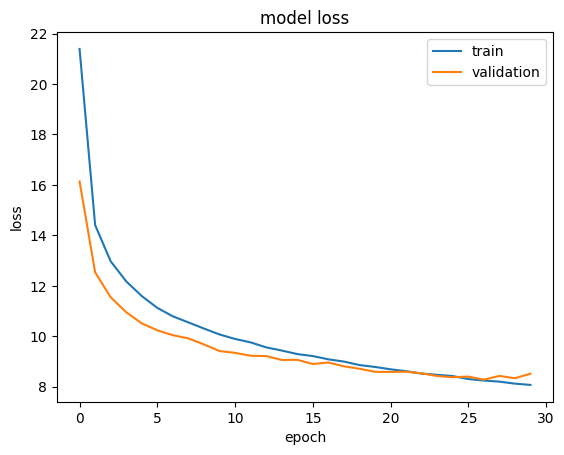

Model: "model_9"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_20 (InputLayer)          [(None, 100, 6, 2)]  0           []                               
                                                                                                  
 batch_normalization_41 (BatchN  (None, 100, 6, 2)   8           ['input_20[0][0]']               
 ormalization)                                                                                    
                                                                                                  
 conv2d_10 (Conv2D)             (None, 100, 6, 64)   1216        ['batch_normalization_41[0][0]'] 
                                                                                                  
 batch_normalization_42 (BatchN  (None, 100, 6, 64)  256         ['conv2d_10[0][0]']        

In [ ]:
#### Main Model ####

inputs_1D = tf.keras.layers.Input( shape=(w,12) )
inputs_2D = tf.keras.layers.Input( shape=(w,6,2) )


inputs_1D_N=BatchNormalization()(inputs_1D)
inputs_2D_N=BatchNormalization()(inputs_2D)


output_1,output_2,output=Gait_SubNet_2(inputs_1D_N,inputs_2D_N)

model = Model(inputs=[inputs_1D, inputs_2D], outputs=[output_1,output_2,output])
model.compile(loss=correlation_coefficient_loss_RMSE, optimizer='Adam')


history=model.fit([np.array(train_X_1D),np.array(train_X_2D)], [train_y_5,train_y_5,train_y_5], epochs=30, batch_size=64, validation_data=([X_validation_1D,\
                                                                      X_validation_2D], [Y_validation,Y_validation,Y_validation]), verbose=2, shuffle=False)

filename = path+'model_Gait_subNet_2.h5'
model.save(filename)
print('>Saved %s' % filename)

# # # summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()
model.summary()


In [ ]:
gc.collect()
gc.collect()
gc.collect()
gc.collect()

0

In [ ]:
model_path = path+'model_Gait_subNet_2.h5'
model=load_model(model_path, custom_objects={'correlation_coefficient_loss_RMSE': correlation_coefficient_loss_RMSE})

yhat_1,yhat_2,yhat_4=model.predict([test_X_1D,test_X_2D])

### Present ###
yhat_5=yhat_4.reshape((yhat_4.shape[0]*w,6))
test_y_r=test_y.reshape((test_y.shape[0]*w,6))

print(yhat_4.shape)


### Unpack ###
yhat_up=unpack_dataset_present(np.array(yhat_5))
test_y_up=unpack_dataset_present(np.array(test_y_r))

print(yhat_up.shape,test_y_up.shape)

### Present ###

yhat_up=yhat_up.reshape(int(len(yhat_up)/6),6)
test_y_up=test_y_up.reshape(int(len(test_y_up)/6),6)

print(yhat_up.shape,test_y_up.shape)

105/105 [==============================] - 3s 13ms/step
(3358, 600)
(1007400,) (1007400,)
(167900, 6) (167900, 6)


In [ ]:
### Present ###

rmse,p= prediction_test(np.array(yhat_up),np.array(test_y_up))

print(rmse[0])
print(rmse[1])
print(rmse[2])

m=np.mean(rmse)

print('\n')
print(m)

print('\n')

print(p[0])
print(p[1])
print(p[2])
print('\n')

print(np.mean(p))

4.401033271937654
5.066745488120478
3.188689034656327


4.218822598238153


0.9671974879531031
0.9772379474196187
0.9409092890975572


0.9617815748234264


In [ ]:
RMSE_Gait_subNet_2=rmse
PCC_Gait_subNet_2=p

Ablation_8=np.hstack([RMSE_Gait_subNet_2,PCC_Gait_subNet_2])

##9. Gait-SubNet-3

In [ ]:
def Gait_SubNet_3(inputs_1D_N,inputs_2D_N):

  model_2=Bidirectional(GRU(128,return_sequences=True))(inputs_1D_N)
  model_2=Dropout(0.4)(model_2)
  model_2=Bidirectional(GRU(64,return_sequences=True))(model_2)
  model_2=Dropout(0.4)(model_2)
  model_2=Flatten()(model_2)

  X=Conv2D(64, (3, 3), activation='relu',padding='same')(inputs_2D_N)
  X=BatchNormalization()(X)
  X=MaxPooling2D((2, 2))(X)
  X=Conv2D(128, (3, 3), activation='relu', padding='same')(X)
  X=BatchNormalization()(X)
  X=MaxPooling2D((2, 2))(X)

  X=Dense(64, activation='relu')(X)
  X=Dropout(0.2)(X)
  X=Dense(32,activation='relu')(X)
  X=Dropout(0.2)(X)
  X_1=Flatten()(X)
  X= concatenate([model_2,X_1])

  model_3=Bidirectional(GRU(128,return_sequences=True))(inputs_1D_N)
  model_3=Dropout(0.4)(model_3)
  model_3=Bidirectional(GRU(64,return_sequences=True))(model_3)
  model_3=Dropout(0.4)(model_3)
  model_3=Flatten()(model_3)

  CNN=Conv1D(filters=64, kernel_size=3, activation='relu',padding='same')(inputs_1D_N)
  CNN=Conv1D(filters=64, kernel_size=3, activation='relu',padding='same')(CNN)
  CNN=BatchNormalization()(CNN)
  CNN=MaxPooling1D(pool_size=2)(CNN)
  CNN=Conv1D(filters=128, kernel_size=3, activation='relu',padding='same')(CNN)
  CNN=Conv1D(filters=128, kernel_size=3, activation='relu',padding='same')(CNN)
  CNN=BatchNormalization()(CNN)
  CNN=MaxPooling1D(pool_size=2)(CNN)

  CNN=Dense(64, activation='relu')(CNN)
  CNN=Dropout(0.2)(CNN)
  CNN=Dense(32, activation='relu')(CNN)
  CNN=Dropout(0.2)(CNN)

  CNN_1=Flatten()(CNN)


  CNN= concatenate([model_3,CNN_1])

  output_C2=Dense(6*w,bias_regularizer=l2(0.001), activation='linear')(X)
  output_C1=Dense(6*w,bias_regularizer=l2(0.001), activation='linear')(CNN)

  output = Average()([output_C2,output_C1])


  return (output_C1,output_C2,output)

Epoch 1/30
401/401 - 41s - loss: 20.1337 - dense_43_loss: 6.6883 - dense_42_loss: 6.9570 - average_3_loss: 6.4883 - val_loss: 18.4370 - val_dense_43_loss: 6.3786 - val_dense_42_loss: 6.0828 - val_average_3_loss: 5.9756 - 41s/epoch - 103ms/step
Epoch 2/30
401/401 - 19s - loss: 13.8764 - dense_43_loss: 4.6955 - dense_42_loss: 4.8023 - average_3_loss: 4.3785 - val_loss: 12.6769 - val_dense_43_loss: 4.2898 - val_dense_42_loss: 4.3175 - val_average_3_loss: 4.0695 - 19s/epoch - 47ms/step
Epoch 3/30
401/401 - 19s - loss: 12.5929 - dense_43_loss: 4.2772 - dense_42_loss: 4.3686 - average_3_loss: 3.9471 - val_loss: 11.6972 - val_dense_43_loss: 3.9913 - val_dense_42_loss: 3.9634 - val_average_3_loss: 3.7425 - 19s/epoch - 47ms/step
Epoch 4/30
401/401 - 19s - loss: 11.8484 - dense_43_loss: 4.0387 - dense_42_loss: 4.1145 - average_3_loss: 3.6951 - val_loss: 11.1428 - val_dense_43_loss: 3.7920 - val_dense_42_loss: 3.8029 - val_average_3_loss: 3.5479 - 19s/epoch - 47ms/step
Epoch 5/30
401/401 - 19s - 

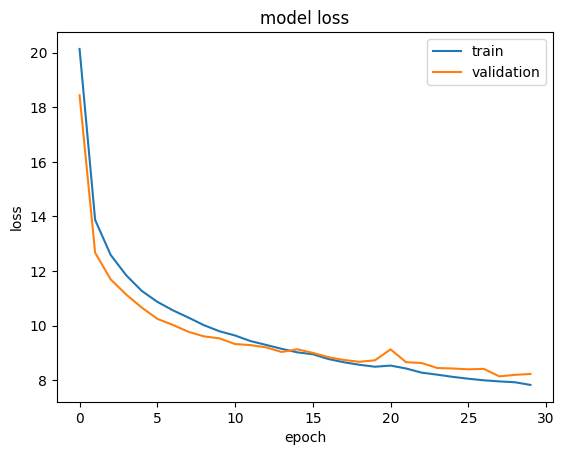

Model: "model_10"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_21 (InputLayer)          [(None, 100, 12)]    0           []                               
                                                                                                  
 batch_normalization_44 (BatchN  (None, 100, 12)     48          ['input_21[0][0]']               
 ormalization)                                                                                    
                                                                                                  
 conv1d_24 (Conv1D)             (None, 100, 64)      2368        ['batch_normalization_44[0][0]'] 
                                                                                                  
 input_22 (InputLayer)          [(None, 100, 6, 2)]  0           []                        

In [ ]:
#### Main Model ####

inputs_1D = tf.keras.layers.Input(shape=(w,12))
inputs_2D = tf.keras.layers.Input(shape=(w,6,2))

inputs_1D_N=BatchNormalization()(inputs_1D)
inputs_2D_N=BatchNormalization()(inputs_2D)

output_1,output_2,output=Gait_SubNet_3(inputs_1D_N,inputs_2D_N)

model = Model(inputs=[inputs_1D, inputs_2D], outputs=[output_1,output_2,output])
model.compile(loss=correlation_coefficient_loss_RMSE, optimizer='Adam')


history=model.fit([np.array(train_X_1D),np.array(train_X_2D)], [train_y_5,train_y_5,train_y_5], epochs=30, batch_size=64, validation_data=([X_validation_1D,\
                                                                      X_validation_2D], [Y_validation,Y_validation,Y_validation]), verbose=2, shuffle=False)

filename = path+'model_Gait_subNet_3.h5'
model.save(filename)
print('>Saved %s' % filename)

# # # summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()
model.summary()


In [ ]:
gc.collect()
gc.collect()
gc.collect()
gc.collect()

0

In [ ]:
model_path = path+'model_Gait_subNet_3.h5'
model=load_model(model_path, custom_objects={'correlation_coefficient_loss_RMSE': correlation_coefficient_loss_RMSE})


yhat_1,yhat_2,yhat_4=model.predict([test_X_1D,test_X_2D])

### Present ###
yhat_5=yhat_4.reshape((yhat_4.shape[0]*w,6))
test_y_r=test_y.reshape((test_y.shape[0]*w,6))

print(yhat_4.shape)


### Unpack ###
yhat_up=unpack_dataset_present(np.array(yhat_5))
test_y_up=unpack_dataset_present(np.array(test_y_r))

print(yhat_up.shape,test_y_up.shape)

### Present ###

yhat_up=yhat_up.reshape(int(len(yhat_up)/6),6)
test_y_up=test_y_up.reshape(int(len(test_y_up)/6),6)

print(yhat_up.shape,test_y_up.shape)

105/105 [==============================] - 5s 19ms/step
(3358, 600)
(1007400,) (1007400,)
(167900, 6) (167900, 6)


In [ ]:
### Present ###

rmse,p= prediction_test(np.array(yhat_up),np.array(test_y_up))

print(rmse[0])
print(rmse[1])
print(rmse[2])

m=np.mean(rmse)

print('\n')
print(m)

print('\n')

print(p[0])
print(p[1])
print(p[2])
print('\n')

print(np.mean(p))

4.605914319194394
5.156815822565488
3.0968258829127246


4.286518674890869


0.9665118199360223
0.9758512517865541
0.9435552437020582


0.9619727718082115


In [ ]:
RMSE_Gait_subNet_3=rmse
PCC_Gait_subNet_3=p

Ablation_9=np.hstack([RMSE_Gait_subNet_3,PCC_Gait_subNet_3])

##10. Gait-Net

In [ ]:
def Gait_Net(inputs_1D_N,inputs_2D_N):

  model_1=Bidirectional(GRU(128,return_sequences=True))(inputs_1D_N)
  model_1=Dropout(0.4)(model_1)
  model_1=Bidirectional(GRU(64,return_sequences=True))(model_1)
  model_1=Dropout(0.4)(model_1)
  model_1=Flatten()(model_1)

  model_2=Bidirectional(GRU(128,return_sequences=True))(inputs_1D_N)
  model_2=Dropout(0.4)(model_2)
  model_2=Bidirectional(GRU(64,return_sequences=True))(model_2)
  model_2=Dropout(0.4)(model_2)
  model_2=Flatten()(model_2)

  X=Conv2D(64, (3, 3), activation='relu',padding='same')(inputs_2D_N)
  X=BatchNormalization()(X)
  X=MaxPooling2D((2, 2))(X)
  X=Conv2D(128, (3, 3), activation='relu', padding='same')(X)
  X=BatchNormalization()(X)
  X=MaxPooling2D((2, 2))(X)
  X=Dense(64, activation='relu')(X)
  X=Dropout(0.2)(X)
  X=Dense(32,activation='relu')(X)
  X=Dropout(0.2)(X)

  X_1=Flatten()(X)
  X= concatenate([model_2,X_1])


  model_3=Bidirectional(GRU(128,return_sequences=True))(inputs_1D_N)
  model_3=Dropout(0.4)(model_3)
  model_3=Bidirectional(GRU(64,return_sequences=True))(model_3)
  model_3=Dropout(0.4)(model_3)
  model_3=Flatten()(model_3)

  CNN=Conv1D(filters=64, kernel_size=3, activation='relu',padding='same')(inputs_1D_N)
  CNN=Conv1D(filters=64, kernel_size=3, activation='relu',padding='same')(CNN)
  CNN=BatchNormalization()(CNN)
  CNN=MaxPooling1D(pool_size=2)(CNN)
  CNN=Conv1D(filters=128, kernel_size=3, activation='relu',padding='same')(CNN)
  CNN=Conv1D(filters=128, kernel_size=3, activation='relu',padding='same')(CNN)
  CNN=BatchNormalization()(CNN)
  CNN=MaxPooling1D(pool_size=2)(CNN)


  CNN=Dense(64, activation='relu')(CNN)
  CNN=Dropout(0.2)(CNN)
  CNN=Dense(32, activation='relu')(CNN)
  CNN=Dropout(0.2)(CNN)

  CNN_1=Flatten()(CNN)


  CNN= concatenate([model_3,CNN_1])

  output_GRU=Dense(6*w,bias_regularizer=l2(0.001), activation='linear')(model_1)
  output_C2=Dense(6*w,bias_regularizer=l2(0.001), activation='linear')(X)
  output_C1=Dense(6*w,bias_regularizer=l2(0.001), activation='linear')(CNN)


  output = Average()([output_GRU,output_C2,output_C1])

  return (output_GRU,output_C2,output_C1,output)

Epoch 1/3
401/401 - 58s - loss: 27.7819 - dense_55_loss: 7.4573 - dense_56_loss: 6.9758 - dense_57_loss: 6.7379 - average_5_loss: 6.6106 - val_loss: 22.1197 - val_dense_55_loss: 4.9225 - val_dense_56_loss: 6.0296 - val_dense_57_loss: 6.0209 - val_average_5_loss: 5.1465 - 58s/epoch - 145ms/step
Epoch 2/3
401/401 - 26s - loss: 18.8016 - dense_55_loss: 4.9310 - dense_56_loss: 4.8011 - dense_57_loss: 4.7198 - average_5_loss: 4.3495 - val_loss: 16.8254 - val_dense_55_loss: 4.2629 - val_dense_56_loss: 4.2069 - val_dense_57_loss: 4.3841 - val_average_5_loss: 3.9714 - 26s/epoch - 66ms/step
Epoch 3/3
401/401 - 27s - loss: 17.0625 - dense_55_loss: 4.5055 - dense_56_loss: 4.3839 - dense_57_loss: 4.2790 - average_5_loss: 3.8941 - val_loss: 15.5536 - val_dense_55_loss: 3.9390 - val_dense_56_loss: 3.9545 - val_dense_57_loss: 4.0062 - val_average_5_loss: 3.6539 - 27s/epoch - 66ms/step
>Saved /content/model_Gait_Net.h5


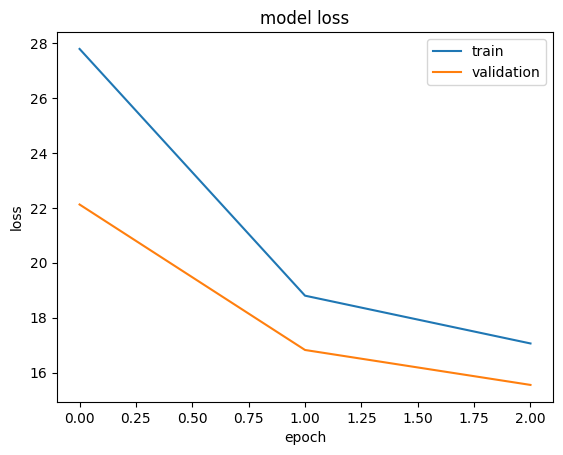

Model: "model_12"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_25 (InputLayer)          [(None, 100, 12)]    0           []                               
                                                                                                  
 batch_normalization_56 (BatchN  (None, 100, 12)     48          ['input_25[0][0]']               
 ormalization)                                                                                    
                                                                                                  
 input_26 (InputLayer)          [(None, 100, 6, 2)]  0           []                               
                                                                                                  
 conv1d_32 (Conv1D)             (None, 100, 64)      2368        ['batch_normalization_56[0

In [ ]:
#### Main Model ####

inputs_1D = tf.keras.layers.Input( shape=(w,12) )
inputs_2D = tf.keras.layers.Input( shape=(w,6,2) )

inputs_1D_N=BatchNormalization()(inputs_1D)
inputs_2D_N=BatchNormalization()(inputs_2D)

output_1,output_2,output_3,output=Gait_Net(inputs_1D_N,inputs_2D_N)

model = Model(inputs=[inputs_1D, inputs_2D], outputs=[output_1,output_2,output_3,output])
model.compile(loss=correlation_coefficient_loss_RMSE, optimizer='Adam')


history=model.fit([np.array(train_X_1D),np.array(train_X_2D)], [train_y_5,train_y_5,train_y_5,train_y_5], epochs=30, batch_size=64, validation_data=([X_validation_1D,\
                                                                      X_validation_2D], [Y_validation,Y_validation,Y_validation,Y_validation]), verbose=2, shuffle=False)

filename = path+'model_Gait_Net.h5'
model.save(filename)
print('>Saved %s' % filename)

# # # summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()
model.summary()


In [ ]:
gc.collect()
gc.collect()
gc.collect()
gc.collect()

0

In [ ]:
model_path = path+'model_Gait_Net.h5'
model=load_model(model_path, custom_objects={'correlation_coefficient_loss_RMSE': correlation_coefficient_loss_RMSE})

[yhat_1,yhat_2,yhat_3,yhat_4]=model.predict([test_X_1D,test_X_2D])


 ### Present ###
yhat_5=yhat_4.reshape((yhat_4.shape[0]*w,6))
test_y_r=test_y.reshape((test_y.shape[0]*w,6))

print(yhat_4.shape)

### Unpack ###
yhat_up=unpack_dataset_present(np.array(yhat_5))
test_y_up=unpack_dataset_present(np.array(test_y_r))

print(yhat_up.shape,test_y_up.shape)

### Present ###

yhat_up=yhat_up.reshape(int(len(yhat_up)/6),6)
test_y_up=test_y_up.reshape(int(len(test_y_up)/6),6)

print(yhat_up.shape,test_y_up.shape)

105/105 [==============================] - 7s 21ms/step
(3358, 600)
(1007400,) (1007400,)
(167900, 6) (167900, 6)


In [ ]:
### Present ###

rmse,p= prediction_test(np.array(yhat_up),np.array(test_y_up))

print(rmse[0])
print(rmse[1])
print(rmse[2])

m=np.mean(rmse)

print('\n')
print(m)

print('\n')

print(p[0])
print(p[1])
print(p[2])
print('\n')

print(np.mean(p))

4.825946702546458
5.627312241694042
3.5629401957288493


4.672066379989784


0.9641941438758591
0.9710051688354097
0.9319228759719252


0.9557073962277314


In [ ]:
RMSE_Gait_Net=rmse
PCC_Gait_Net=p

Ablation_10=np.hstack([RMSE_Gait_Net,PCC_Gait_Net])

## 11. Gait-Net--Joint Loss

Epoch 1/3
401/401 - 102s - loss: 28.2695 - dense_62_loss: 7.5527 - dense_63_loss: 7.0982 - dense_64_loss: 6.8885 - average_6_loss: 6.7298 - val_loss: 22.3608 - val_dense_62_loss: 4.9740 - val_dense_63_loss: 5.9077 - val_dense_64_loss: 6.2411 - val_average_6_loss: 5.2378 - 102s/epoch - 253ms/step
Epoch 2/3
401/401 - 27s - loss: 19.0415 - dense_62_loss: 4.9852 - dense_63_loss: 4.8615 - dense_64_loss: 4.7789 - average_6_loss: 4.4158 - val_loss: 16.8870 - val_dense_62_loss: 4.4046 - val_dense_63_loss: 4.2004 - val_dense_64_loss: 4.2890 - val_average_6_loss: 3.9929 - 27s/epoch - 68ms/step
Epoch 3/3
401/401 - 27s - loss: 17.1815 - dense_62_loss: 4.5158 - dense_63_loss: 4.4039 - dense_64_loss: 4.3367 - average_6_loss: 3.9249 - val_loss: 15.5370 - val_dense_62_loss: 3.9834 - val_dense_63_loss: 3.8745 - val_dense_64_loss: 4.0308 - val_average_6_loss: 3.6483 - 27s/epoch - 67ms/step
>Saved /content/model_Gait_JL_Net.h5


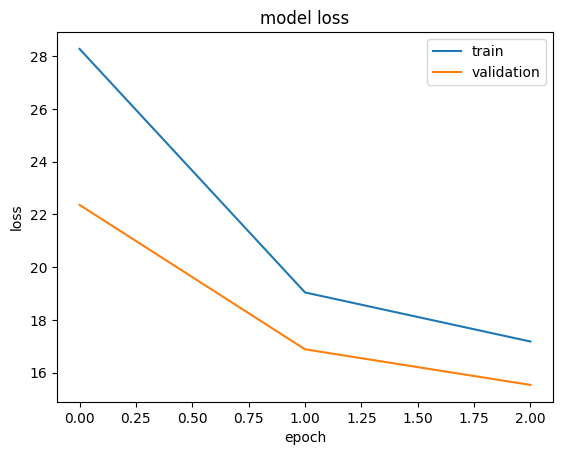

Model: "model_13"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_27 (InputLayer)          [(None, 100, 12)]    0           []                               
                                                                                                  
 batch_normalization_62 (BatchN  (None, 100, 12)     48          ['input_27[0][0]']               
 ormalization)                                                                                    
                                                                                                  
 input_28 (InputLayer)          [(None, 100, 6, 2)]  0           []                               
                                                                                                  
 conv1d_36 (Conv1D)             (None, 100, 64)      2368        ['batch_normalization_62[0

In [ ]:
#### Main Model ####

inputs_1D = tf.keras.layers.Input( shape=(w,12) )
inputs_2D = tf.keras.layers.Input( shape=(w,6,2) )


inputs_1D_N=BatchNormalization()(inputs_1D)
inputs_2D_N=BatchNormalization()(inputs_2D)


output_1,output_2,output_3,output=Gait_Net(inputs_1D_N,inputs_2D_N)

model = Model(inputs=[inputs_1D, inputs_2D], outputs=[output_1,output_2,output_3,output])
model.compile(loss=correlation_coefficient_loss_joint, optimizer='Adam')


history=model.fit([np.array(train_X_1D),np.array(train_X_2D)], [train_y_5,train_y_5,train_y_5,train_y_5], epochs=30, batch_size=64, validation_data=([X_validation_1D,\
                                                                      X_validation_2D], [Y_validation,Y_validation,Y_validation,Y_validation]), verbose=2, shuffle=False)

filename = path+'model_Gait_JL_Net.h5'
model.save(filename)
print('>Saved %s' % filename)

# # # summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()
model.summary()


In [ ]:
gc.collect()
gc.collect()
gc.collect()
gc.collect()

0

In [ ]:
model_path = path+'model_GRU_Conv2D.h5'
model=load_model(model_path, custom_objects={'correlation_coefficient_loss_RMSE': correlation_coefficient_loss_RMSE})

[yhat_1,yhat_2,yhat_3,yhat_4]=model.predict([test_X_1D,test_X_2D])


 ### Present ###
yhat_5=yhat_4.reshape((yhat_4.shape[0]*w,6))
test_y_r=test_y.reshape((test_y.shape[0]*w,6))

print(yhat_4.shape)

### Unpack ###
yhat_up=unpack_dataset_present(np.array(yhat_5),80)
test_y_up=unpack_dataset_present(np.array(test_y_r),80)

print(yhat_up.shape,test_y_up.shape)


### Present ###

yhat_up=yhat_up.reshape(int(len(yhat_up)/6),6)
test_y_up=test_y_up.reshape(int(len(test_y_up)/6),6)

print(yhat_up.shape,test_y_up.shape)

In [ ]:
### Present ###

rmse,p= prediction_test(np.array(yhat_up),np.array(test_y_up))

print(rmse[0])
print(rmse[1])
print(rmse[2])

m=np.mean(rmse)

print('\n')
print(m)

print('\n')

print(p[0])
print(p[1])
print(p[2])
print('\n')

print(np.mean(p))

In [ ]:
RMSE_Gait_JL_Net=rmse
PCC_Gait_JL_Net=p

Ablation_11=np.hstack([RMSE_Gait_JL_Net,PCC_Gait_JL_Net])

# Augmentation+ Joint Loss analysis

## Data Loader

In [ ]:
def data_loader(subject):
  with h5py.File('/content/drive/My Drive/Kinematics Prediction/All_subjects_data_kinetics.h5', 'r') as hf:
    All_subjects = hf['All_subjects']
    Subject = All_subjects[subject]

    HOF=Subject['hof']
    IMU_KIN=Subject['IMU_Kin']

    treadmill_hof = HOF['Treadmill']
    levelground_hof = HOF['Levelground']
    slope_hof = HOF['Slope']
    stair_hof = HOF['Stair']
    round_hof = HOF['Round']
    obstacles_hof = HOF['Obstacles']

    treadmill_IMU_kin = IMU_KIN['Treadmill']
    levelground_IMU_kin = IMU_KIN['Levelground']
    slope_IMU_kin = IMU_KIN['Slope']
    stair_IMU_kin = IMU_KIN['Stair']
    round_IMU_kin= IMU_KIN['Round']
    obstacles_IMU_kin = IMU_KIN['Obstacles']


    hof_data=np.concatenate((treadmill_hof,levelground_hof,levelground_hof,slope_hof,slope_hof,slope_hof,stair_hof,stair_hof,stair_hof,stair_hof,round_hof,obstacles_hof,round_hof,\
                             obstacles_hof,round_hof,obstacles_hof,round_hof,obstacles_hof),axis=0)
    IMU_kin_data=np.concatenate((treadmill_IMU_kin,levelground_IMU_kin,levelground_IMU_kin,slope_IMU_kin,slope_IMU_kin,slope_IMU_kin,stair_IMU_kin,stair_IMU_kin,\
                                 stair_IMU_kin,round_IMU_kin,obstacles_IMU_kin,round_IMU_kin,obstacles_IMU_kin,round_IMU_kin,obstacles_IMU_kin,round_IMU_kin,obstacles_IMU_kin),axis=0)

    return np.array(hof_data), np.array(IMU_kin_data)


In [ ]:
subject_1_data_hof_aug, subject_1_data_IMU_Kin_aug=data_loader('Subject_1')
gc.collect()
subject_2_data_hof_aug, subject_2_data_IMU_Kin_aug=data_loader('Subject_2')
gc.collect()
subject_3_data_hof_aug, subject_3_data_IMU_Kin_aug=data_loader('Subject_3')
gc.collect()
subject_4_data_hof_aug, subject_4_data_IMU_Kin_aug=data_loader('Subject_4')
gc.collect()
subject_5_data_hof_aug, subject_5_data_IMU_Kin_aug=data_loader('Subject_5')
gc.collect()
subject_6_data_hof_aug, subject_6_data_IMU_Kin_aug=data_loader('Subject_6')
gc.collect()
subject_7_data_hof_aug, subject_7_data_IMU_Kin_aug=data_loader('Subject_7')
gc.collect()
subject_8_data_hof_aug, subject_8_data_IMU_Kin_aug=data_loader('Subject_8')
gc.collect()
subject_9_data_hof_aug, subject_9_data_IMU_Kin_aug=data_loader('Subject_9')
gc.collect()
subject_10_data_hof_aug, subject_10_data_IMU_Kin_aug=data_loader('Subject_10')
gc.collect()

0

##Subject Selection

In [ ]:
main_dir = "/content/drive/My Drive/public dataset/Public_dataset_2/Subject01"
# os.mkdir(main_dir)
path="/content/"
subject='Subject_01'
encoder='lstm'

In [ ]:
train_data_hof_aug=np.concatenate((subject_1_data_hof_aug,subject_2_data_hof_aug,subject_4_data_hof_aug,subject_5_data_hof_aug,subject_6_data_hof_aug,
                               subject_7_data_hof_aug,subject_8_data_hof_aug,subject_9_data_hof_aug,subject_10_data_hof_aug),axis=0)

train_data_IMU_Kin_aug=np.concatenate((subject_1_data_IMU_Kin_aug,subject_2_data_IMU_Kin_aug,subject_4_data_IMU_Kin_aug,subject_5_data_IMU_Kin_aug,subject_6_data_IMU_Kin_aug,
                               subject_7_data_IMU_Kin_aug,subject_8_data_IMU_Kin_aug,subject_9_data_IMU_Kin_aug,subject_10_data_IMU_Kin_aug),axis=0)

test_data_hof=subject_3_data_hof
test_data_IMU_Kin=subject_3_data_IMU_Kin

## Data Processing

In [ ]:
##### IMUs-0:48
# Sensor 1- Sternum
# Sensor 2-Sacrum
# Sensor 3-R_thigh
# Sensor 4-L_thigh
# Sensor 5-R_shank
# Sensor 6-L_shank
# Sensor 7-R_dorsal
# Sensor 8-L_dorsal

train_dataset_IMU=train_data_IMU_Kin_aug[:,36:48]
train_dataset_hof=train_data_hof_aug
train_dataset_target=np.concatenate((train_data_IMU_Kin_aug[:,55:56],train_data_IMU_Kin_aug[:,58:60],train_data_IMU_Kin_aug[:,62:63],train_data_IMU_Kin_aug[:,65:67]),axis=1)


test_dataset_IMU=test_data_IMU_Kin[:,36:48]
test_dataset_hof=test_data_hof
test_dataset_target=np.concatenate((test_data_IMU_Kin[:,55:56],test_data_IMU_Kin[:,58:60],test_data_IMU_Kin[:,62:63],test_data_IMU_Kin[:,65:67]),axis=1)

print(train_dataset_IMU.shape)
print(train_dataset_hof.shape)
print(train_dataset_target.shape)


gc.collect()
gc.collect()
gc.collect()


(3830166, 12)
(1359628, 36)
(3830166, 6)


Exception ignored in: <function _xla_gc_callback at 0x7fec355135b0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/jax/_src/lib/__init__.py", line 103, in _xla_gc_callback
    def _xla_gc_callback(*args):
KeyboardInterrupt: 


0

## Data creation

In [ ]:
# # convert an array of values into a dataset matrix
def create_dataset_present(dataset_1, window=100):
  dataX= []
  k=0
  shift=50
  for i in range(int(len(dataset_1)/shift)-1):
    j=shift*k
    a = dataset_1[j:j+window,:]
    dataX.append(a)
    k=k+1
  return np.array(dataX)

In [ ]:
import gc
gc.collect()

0

In [ ]:
### Reconstruction/Present Dataset ###
w=100

train_X_3=create_dataset_present(train_dataset_IMU,w)
train_y_3=create_dataset_present(train_dataset_target,w)

test_X_1D=create_dataset_present(test_dataset_IMU,w)
test_y=create_dataset_present(test_dataset_target,w)

In [ ]:
train_y_3=train_y_3.reshape(train_y_3.shape[0],w*6)
test_y=test_y.reshape(test_y.shape[0],w*6)


In [ ]:
train_X_1D, X_validation_1D, train_y_5, Y_validation = train_test_split(train_X_3,train_y_3, test_size=0.20, random_state=True)


train_X_1D=train_X_1D
X_validation_1D=X_validation_1D
test_X_1D=test_X_1D

print(train_X_1D.shape,train_y_5.shape,X_validation_1D.shape,Y_validation.shape)

(61281, 100, 12) (61281, 600) (15321, 100, 12) (15321, 600)


In [ ]:
features=6

train_X_2D=train_X_1D[:,:,0:12].reshape(train_X_1D.shape[0],train_X_1D.shape[1],features,2)
test_X_2D=test_X_1D[:,:,0:12].reshape(test_X_1D.shape[0],test_X_1D.shape[1],features,2)
X_validation_2D= X_validation_1D[:,:,0:12].reshape(X_validation_1D.shape[0],
                                                   X_validation_1D.shape[1],features,2)


print(train_X_2D.shape,test_X_2D.shape,X_validation_2D.shape)

(61281, 100, 6, 2) (3358, 100, 6, 2) (15321, 100, 6, 2)


## 12. Gait-Net+Augmentation

Epoch 1/3
958/958 - 99s - loss: 22.6453 - dense_76_loss: 6.0000 - dense_77_loss: 5.7378 - dense_78_loss: 5.5861 - average_8_loss: 5.3213 - val_loss: 16.2230 - val_dense_76_loss: 4.2845 - val_dense_77_loss: 4.0804 - val_dense_78_loss: 4.0560 - val_average_8_loss: 3.8020 - 99s/epoch - 104ms/step
Epoch 2/3
958/958 - 65s - loss: 16.3399 - dense_76_loss: 4.3405 - dense_77_loss: 4.1921 - dense_78_loss: 4.0893 - average_8_loss: 3.7180 - val_loss: 14.4600 - val_dense_76_loss: 3.8067 - val_dense_77_loss: 3.6263 - val_dense_78_loss: 3.6578 - val_average_8_loss: 3.3691 - 65s/epoch - 68ms/step
Epoch 3/3
958/958 - 66s - loss: 14.9401 - dense_76_loss: 3.9663 - dense_77_loss: 3.8660 - dense_78_loss: 3.7447 - average_8_loss: 3.3630 - val_loss: 13.2210 - val_dense_76_loss: 3.4752 - val_dense_77_loss: 3.3371 - val_dense_78_loss: 3.3272 - val_average_8_loss: 3.0814 - 66s/epoch - 69ms/step
>Saved /content/model_Gait_A_Net.h5


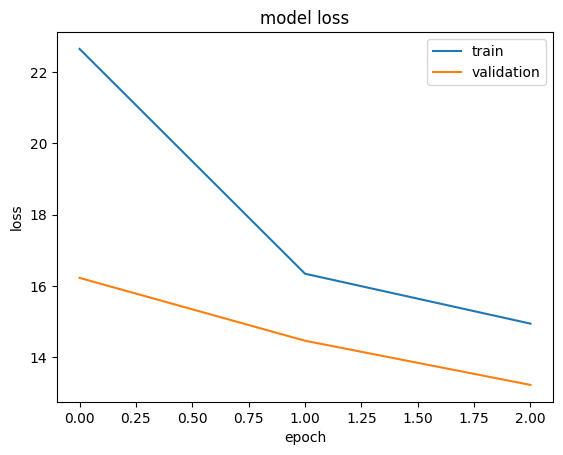

Model: "model_15"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_31 (InputLayer)          [(None, 100, 12)]    0           []                               
                                                                                                  
 batch_normalization_74 (BatchN  (None, 100, 12)     48          ['input_31[0][0]']               
 ormalization)                                                                                    
                                                                                                  
 input_32 (InputLayer)          [(None, 100, 6, 2)]  0           []                               
                                                                                                  
 conv1d_44 (Conv1D)             (None, 100, 64)      2368        ['batch_normalization_74[0

In [ ]:
#### Main Model ####

inputs_1D = tf.keras.layers.Input(shape=(w,12))
inputs_2D = tf.keras.layers.Input(shape=(w,6,2))

inputs_1D_N=BatchNormalization()(inputs_1D)
inputs_2D_N=BatchNormalization()(inputs_2D)

output_1,output_2,output_3,output=Gait_Net(inputs_1D_N,inputs_2D_N)

model = Model(inputs=[inputs_1D, inputs_2D], outputs=[output_1,output_2,output_3,output])
model.compile(loss=correlation_coefficient_loss_RMSE, optimizer='Adam')


history=model.fit([np.array(train_X_1D),np.array(train_X_2D)], [train_y_5,train_y_5,train_y_5,train_y_5], epochs=30, batch_size=64, validation_data=([X_validation_1D,\
                                                                      X_validation_2D], [Y_validation,Y_validation,Y_validation,Y_validation]), verbose=2, shuffle=False)

filename = path+'model_Gait_A_Net.h5'
model.save(filename)
print('>Saved %s' % filename)

# # # summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()
model.summary()


In [ ]:
gc.collect()
gc.collect()
gc.collect()
gc.collect()

0

In [ ]:
model_path = path+'model_Gait_A_Net.h5'
model=load_model(model_path, custom_objects={'correlation_coefficient_loss_RMSE': correlation_coefficient_loss_RMSE})

[yhat_1,yhat_2,yhat_3,yhat_4]=model.predict([test_X_1D,test_X_2D])


 ### Present ###
yhat_5=yhat_4.reshape((yhat_4.shape[0]*w,6))
test_y_r=test_y.reshape((test_y.shape[0]*w,6))

print(yhat_4.shape)
### Future ###

### Unpack ###
yhat_up=unpack_dataset_present(np.array(yhat_5))
test_y_up=unpack_dataset_present(np.array(test_y_r))

print(yhat_up.shape,test_y_up.shape)


### Present ###

yhat_up=yhat_up.reshape(int(len(yhat_up)/6),6)
test_y_up=test_y_up.reshape(int(len(test_y_up)/6),6)

print(yhat_up.shape,test_y_up.shape)

254/254 [==============================] - 10s 23ms/step
(8102, 600)
(2430600,) (2430600,)
(405100, 6) (405100, 6)


In [ ]:
### Present ###

rmse,p= prediction_test(np.array(yhat_up),np.array(test_y_up))

print(rmse[0])
print(rmse[1])
print(rmse[2])

m=np.mean(rmse)

print('\n')
print(m)

print('\n')

print(p[0])
print(p[1])
print(p[2])
print('\n')

print(np.mean(p))

5.076749963143114
5.511317549576425
3.219463580787635


4.602510364502392


0.9597718567556781
0.9727510621371238
0.9430899530888224


0.9585376239938747


In [ ]:
RMSE_Gait_A_Net=rmse
PCC_Gait_A_Net=p

Ablation_12=np.hstack([RMSE_Gait_A_Net,PCC_Gait_A_Net])

## 13. Gait-JL-Net+Augmentation

Epoch 1/3
958/958 - 98s - loss: 23.0724 - dense_83_loss: 6.1104 - dense_84_loss: 5.8526 - dense_85_loss: 5.6958 - average_9_loss: 5.4135 - val_loss: 16.4046 - val_dense_83_loss: 4.3077 - val_dense_84_loss: 4.0927 - val_dense_85_loss: 4.1679 - val_average_9_loss: 3.8362 - 98s/epoch - 103ms/step
Epoch 2/3
958/958 - 66s - loss: 16.5354 - dense_83_loss: 4.3643 - dense_84_loss: 4.2540 - dense_85_loss: 4.1661 - average_9_loss: 3.7510 - val_loss: 14.2244 - val_dense_83_loss: 3.7326 - val_dense_84_loss: 3.5778 - val_dense_85_loss: 3.5974 - val_average_9_loss: 3.3166 - 66s/epoch - 68ms/step
Epoch 3/3
958/958 - 64s - loss: 15.0513 - dense_83_loss: 3.9795 - dense_84_loss: 3.8860 - dense_85_loss: 3.8059 - average_9_loss: 3.3799 - val_loss: 13.3125 - val_dense_83_loss: 3.4402 - val_dense_84_loss: 3.3515 - val_dense_85_loss: 3.4232 - val_average_9_loss: 3.0976 - 64s/epoch - 67ms/step
>Saved /content/model_Gait_JL_A_Net.h5


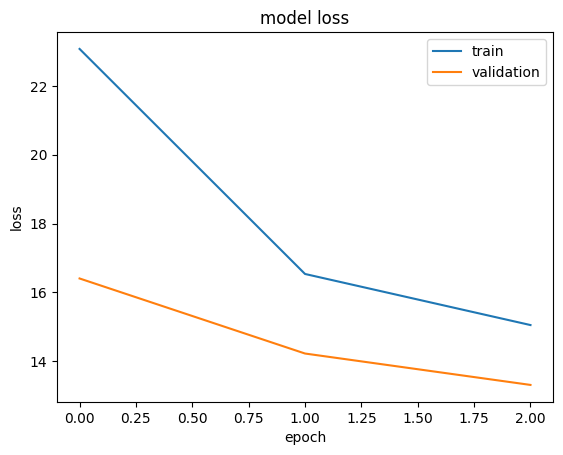

Model: "model_16"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_33 (InputLayer)          [(None, 100, 12)]    0           []                               
                                                                                                  
 batch_normalization_80 (BatchN  (None, 100, 12)     48          ['input_33[0][0]']               
 ormalization)                                                                                    
                                                                                                  
 input_34 (InputLayer)          [(None, 100, 6, 2)]  0           []                               
                                                                                                  
 conv1d_48 (Conv1D)             (None, 100, 64)      2368        ['batch_normalization_80[0

In [ ]:
#### Main Model ####

inputs_1D = tf.keras.layers.Input( shape=(w,12) )
inputs_2D = tf.keras.layers.Input( shape=(w,6,2) )


inputs_1D_N=BatchNormalization()(inputs_1D)
inputs_2D_N=BatchNormalization()(inputs_2D)


output_1,output_2,output_3,output=Gait_Net(inputs_1D_N,inputs_2D_N)

model = Model(inputs=[inputs_1D, inputs_2D], outputs=[output_1,output_2,output_3,output])
model.compile(loss=correlation_coefficient_loss_joint, optimizer='Adam')


history=model.fit([np.array(train_X_1D),np.array(train_X_2D)], [train_y_5,train_y_5,train_y_5,train_y_5], epochs=30, batch_size=64, validation_data=([X_validation_1D,\
                                                                      X_validation_2D], [Y_validation,Y_validation,Y_validation,Y_validation]), verbose=2, shuffle=False)

filename = path+'model_Gait_JL_A_Net.h5'
model.save(filename)
print('>Saved %s' % filename)

# # # summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()
model.summary()


In [ ]:
gc.collect()
gc.collect()
gc.collect()
gc.collect()

0

In [ ]:
model_path = path+'model_Gait_JL_A_Net.h5'
model=load_model(model_path, custom_objects={'correlation_coefficient_loss_joint': correlation_coefficient_loss_joint})

[yhat_1,yhat_2,yhat_3,yhat_4]=model.predict([test_X_1D,test_X_2D])


 ### Present ###
yhat_5=yhat_4.reshape((yhat_4.shape[0]*w,6))
test_y_r=test_y.reshape((test_y.shape[0]*w,6))

print(yhat_4.shape)

### Unpack ###
yhat_up=unpack_dataset_present(np.array(yhat_5))
test_y_up=unpack_dataset_present(np.array(test_y_r))

print(yhat_up.shape,test_y_up.shape)


### Present ###

yhat_up=yhat_up.reshape(int(len(yhat_up)/6),6)
test_y_up=test_y_up.reshape(int(len(test_y_up)/6),6)

print(yhat_up.shape,test_y_up.shape)

254/254 [==============================] - 9s 20ms/step
(8102, 600)
(2430600,) (2430600,)
(405100, 6) (405100, 6)


In [ ]:
### Present ###

rmse,p= prediction_test(np.array(yhat_up),np.array(test_y_up))

print(rmse[0])
print(rmse[1])
print(rmse[2])

m=np.mean(rmse)

print('\n')
print(m)

print('\n')

print(p[0])
print(p[1])
print(p[2])
print('\n')

print(np.mean(p))

4.768077403051798
5.331573289528146
3.271911692637215


4.457187461739053


0.9626753279644793
0.9748284659157724
0.9398429538652718


0.9591155825818412


In [ ]:
RMSE_Gait_JL_A_Net=rmse
PCC_Gait_JL_A_Net=p

Ablation_13=np.hstack([RMSE_Gait_JL_A_Net,PCC_Gait_JL_A_Net])

## Loss function with respect to weight

In [ ]:
def correlation_coefficient_loss_joint_2(y_true, y_pred):
    # Calculate mean values
    mx = tf.reduce_mean(y_true)
    my = tf.reduce_mean(y_pred)

    # Calculate differences from mean
    xm, ym = y_true - mx, y_pred - my

    # Calculate numerator and denominator of Pearson correlation coefficient
    r_num = tf.reduce_sum(tf.multiply(xm, ym))
    r_den = tf.sqrt(tf.multiply(tf.reduce_sum(tf.square(xm)), tf.reduce_sum(tf.square(ym))))

    # Calculate Pearson correlation coefficient
    r = r_num / r_den

    # Clamp r between -1 and 1
    r = tf.maximum(tf.minimum(r, 1.0), -1.0)

    # Calculate l2 loss
    l2 = 1 - tf.square(r)

    l1=K.sqrt(K.mean(K.square(y_true - y_pred)))


    return l1+2*l2

In [ ]:
def correlation_coefficient_loss_joint_4(y_true, y_pred):
    # Calculate mean values
    mx = tf.reduce_mean(y_true)
    my = tf.reduce_mean(y_pred)

    # Calculate differences from mean
    xm, ym = y_true - mx, y_pred - my

    # Calculate numerator and denominator of Pearson correlation coefficient
    r_num = tf.reduce_sum(tf.multiply(xm, ym))
    r_den = tf.sqrt(tf.multiply(tf.reduce_sum(tf.square(xm)), tf.reduce_sum(tf.square(ym))))

    # Calculate Pearson correlation coefficient
    r = r_num / r_den

    # Clamp r between -1 and 1
    r = tf.maximum(tf.minimum(r, 1.0), -1.0)

    # Calculate l2 loss
    l2 = 1 - tf.square(r)

    l1=K.sqrt(K.mean(K.square(y_true - y_pred)))


    return l1+4*l2

In [ ]:
def correlation_coefficient_loss_joint_6(y_true, y_pred):
    # Calculate mean values
    mx = tf.reduce_mean(y_true)
    my = tf.reduce_mean(y_pred)

    # Calculate differences from mean
    xm, ym = y_true - mx, y_pred - my

    # Calculate numerator and denominator of Pearson correlation coefficient
    r_num = tf.reduce_sum(tf.multiply(xm, ym))
    r_den = tf.sqrt(tf.multiply(tf.reduce_sum(tf.square(xm)), tf.reduce_sum(tf.square(ym))))

    # Calculate Pearson correlation coefficient
    r = r_num / r_den

    # Clamp r between -1 and 1
    r = tf.maximum(tf.minimum(r, 1.0), -1.0)

    # Calculate l2 loss
    l2 = 1 - tf.square(r)

    l1=K.sqrt(K.mean(K.square(y_true - y_pred)))


    return l1+6*l2

In [ ]:
def correlation_coefficient_loss_joint_8(y_true, y_pred):
    # Calculate mean values
    mx = tf.reduce_mean(y_true)
    my = tf.reduce_mean(y_pred)

    # Calculate differences from mean
    xm, ym = y_true - mx, y_pred - my

    # Calculate numerator and denominator of Pearson correlation coefficient
    r_num = tf.reduce_sum(tf.multiply(xm, ym))
    r_den = tf.sqrt(tf.multiply(tf.reduce_sum(tf.square(xm)), tf.reduce_sum(tf.square(ym))))

    # Calculate Pearson correlation coefficient
    r = r_num / r_den

    # Clamp r between -1 and 1
    r = tf.maximum(tf.minimum(r, 1.0), -1.0)

    # Calculate l2 loss
    l2 = 1 - tf.square(r)

    l1=K.sqrt(K.mean(K.square(y_true - y_pred)))


    return l1+8*l2

In [ ]:
def correlation_coefficient_loss_joint_10(y_true, y_pred):
    # Calculate mean values
    mx = tf.reduce_mean(y_true)
    my = tf.reduce_mean(y_pred)

    # Calculate differences from mean
    xm, ym = y_true - mx, y_pred - my

    # Calculate numerator and denominator of Pearson correlation coefficient
    r_num = tf.reduce_sum(tf.multiply(xm, ym))
    r_den = tf.sqrt(tf.multiply(tf.reduce_sum(tf.square(xm)), tf.reduce_sum(tf.square(ym))))

    # Calculate Pearson correlation coefficient
    r = r_num / r_den

    # Clamp r between -1 and 1
    r = tf.maximum(tf.minimum(r, 1.0), -1.0)

    # Calculate l2 loss
    l2 = 1 - tf.square(r)

    l1=K.sqrt(K.mean(K.square(y_true - y_pred)))


    return l1+10*l2

## 14. Gait-JL-Net_2+Augmentation

In [ ]:
#### Main Model ####

inputs_1D = tf.keras.layers.Input( shape=(w,12) )
inputs_2D = tf.keras.layers.Input( shape=(w,6,2) )


inputs_1D_N=BatchNormalization()(inputs_1D)
inputs_2D_N=BatchNormalization()(inputs_2D)


output_1,output_2,output_3,output=Gait_Net(inputs_1D_N,inputs_2D_N)

model = Model(inputs=[inputs_1D, inputs_2D], outputs=[output_1,output_2,output_3,output])
model.compile(loss=correlation_coefficient_loss_joint_2, optimizer='Adam')


history=model.fit([np.array(train_X_1D),np.array(train_X_2D)], [train_y_5,train_y_5,train_y_5,train_y_5], epochs=30, batch_size=64, validation_data=([X_validation_1D,\
                                                                      X_validation_2D], [Y_validation,Y_validation,Y_validation,Y_validation]), verbose=2, shuffle=False)

filename = path+'model_Gait_JL_A_Net_2.h5'
model.save(filename)
print('>Saved %s' % filename)

# # # summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()
model.summary()


In [ ]:
gc.collect()
gc.collect()
gc.collect()
gc.collect()

0

In [ ]:
model_path = path+'model_Gait_JL_A_Net_2.h5'
model=load_model(model_path, custom_objects={'correlation_coefficient_loss_joint_2': correlation_coefficient_loss_joint_2})

[yhat_1,yhat_2,yhat_3,yhat_4]=model.predict([test_X_1D,test_X_2D])



 ### Present ###
yhat_5=yhat_4.reshape((yhat_4.shape[0]*w,6))
test_y_r=test_y.reshape((test_y.shape[0]*w,6))

print(yhat_4.shape)

### Unpack ###
yhat_up=unpack_dataset_present(np.array(yhat_5))
test_y_up=unpack_dataset_present(np.array(test_y_r))

print(yhat_up.shape,test_y_up.shape)


### Present ###

yhat_up=yhat_up.reshape(int(len(yhat_up)/6),6)
test_y_up=test_y_up.reshape(int(len(test_y_up)/6),6)

print(yhat_up.shape,test_y_up.shape)

(1942, 600)
(582900,) (582900,)
(97150, 6) (97150, 6)


In [ ]:
### Present ###

rmse,p= prediction_test(np.array(yhat_up),np.array(test_y_up))

print(rmse[0])
print(rmse[1])
print(rmse[2])

m=np.mean(rmse)

print('\n')
print(m)

print('\n')

print(p[0])
print(p[1])
print(p[2])
print('\n')

print(np.mean(p))

6.1776005394500455
6.451901192072329
3.856230104021027


5.495243945181134


0.9688576280858674
0.9786572300522426
0.9517962193767109


0.9664370258382736


In [ ]:
RMSE_Gait_JL_A_Net_2=rmse
PCC_Gait_JL_A_Net_2=p

Ablation_14=np.hstack([RMSE_Gait_JL_A_Net_2,PCC_Gait_JL_A_Net_2])

## 15. Gait-JL-Net_4+Augmentation

Epoch 1/3
958/958 - 100s - loss: 23.8420 - dense_90_loss: 6.3203 - dense_91_loss: 6.0700 - dense_92_loss: 5.8620 - average_10_loss: 5.5895 - val_loss: 16.9444 - val_dense_90_loss: 4.4605 - val_dense_91_loss: 4.2960 - val_dense_92_loss: 4.2361 - val_average_10_loss: 3.9517 - 100s/epoch - 104ms/step
Epoch 2/3
958/958 - 72s - loss: 16.8784 - dense_90_loss: 4.4595 - dense_91_loss: 4.3538 - dense_92_loss: 4.2336 - average_10_loss: 3.8314 - val_loss: 14.6825 - val_dense_90_loss: 3.8037 - val_dense_91_loss: 3.6969 - val_dense_92_loss: 3.7754 - val_average_10_loss: 3.4065 - 72s/epoch - 75ms/step
Epoch 3/3
958/958 - 70s - loss: 15.3739 - dense_90_loss: 4.0610 - dense_91_loss: 3.9770 - dense_92_loss: 3.8888 - average_10_loss: 3.4470 - val_loss: 13.5495 - val_dense_90_loss: 3.5206 - val_dense_91_loss: 3.4419 - val_dense_92_loss: 3.4427 - val_average_10_loss: 3.1442 - 70s/epoch - 73ms/step
>Saved /content/model_Gait_JL_A_Net_4.h5


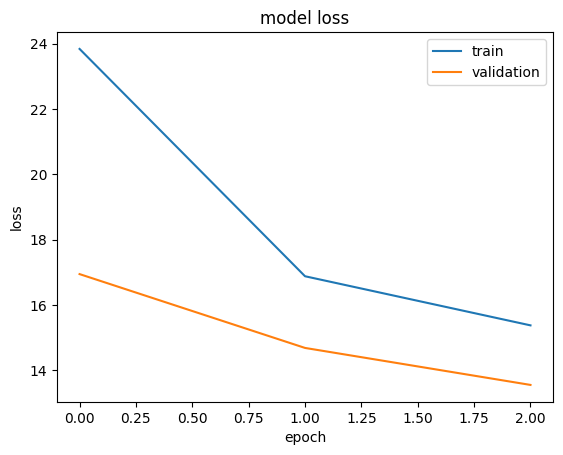

Model: "model_17"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_35 (InputLayer)          [(None, 100, 12)]    0           []                               
                                                                                                  
 batch_normalization_86 (BatchN  (None, 100, 12)     48          ['input_35[0][0]']               
 ormalization)                                                                                    
                                                                                                  
 input_36 (InputLayer)          [(None, 100, 6, 2)]  0           []                               
                                                                                                  
 conv1d_52 (Conv1D)             (None, 100, 64)      2368        ['batch_normalization_86[0

In [ ]:
#### Main Model ####

inputs_1D = tf.keras.layers.Input( shape=(w,12) )
inputs_2D = tf.keras.layers.Input( shape=(w,6,2) )


inputs_1D_N=BatchNormalization()(inputs_1D)
inputs_2D_N=BatchNormalization()(inputs_2D)


output_1,output_2,output_3,output=Gait_Net(inputs_1D_N,inputs_2D_N)

model = Model(inputs=[inputs_1D, inputs_2D], outputs=[output_1,output_2,output_3,output])
model.compile(loss=correlation_coefficient_loss_joint_4, optimizer='Adam')

history=model.fit([np.array(train_X_1D),np.array(train_X_2D)], [train_y_5,train_y_5,train_y_5,train_y_5], epochs=30, batch_size=64, validation_data=([X_validation_1D,\
                                                                      X_validation_2D], [Y_validation,Y_validation,Y_validation,Y_validation]), verbose=2, shuffle=False)

filename = path+'model_Gait_JL_A_Net_4.h5'
model.save(filename)
print('>Saved %s' % filename)

# # # summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()
model.summary()


In [ ]:
gc.collect()
gc.collect()
gc.collect()
gc.collect()

0

In [ ]:
model_path = path+'model_Gait_JL_A_Net_4.h5'
model=load_model(model_path, custom_objects={'correlation_coefficient_loss_joint_4': correlation_coefficient_loss_joint_4})

[yhat_1,yhat_2,yhat_3,yhat_4]=model.predict([test_X_1D,test_X_2D])


 ### Present ###
yhat_5=yhat_4.reshape((yhat_4.shape[0]*w,6))
test_y_r=test_y.reshape((test_y.shape[0]*w,6))

print(yhat_4.shape)

### Unpack ###
yhat_up=unpack_dataset_present(np.array(yhat_5))
test_y_up=unpack_dataset_present(np.array(test_y_r))

print(yhat_up.shape,test_y_up.shape)


### Present ###

yhat_up=yhat_up.reshape(int(len(yhat_up)/6),6)
test_y_up=test_y_up.reshape(int(len(test_y_up)/6),6)

print(yhat_up.shape,test_y_up.shape)

105/105 [==============================] - 6s 21ms/step
(3358, 600)
(1007400,) (1007400,)
(167900, 6) (167900, 6)


In [ ]:
### Present ###

rmse,p= prediction_test(np.array(yhat_up),np.array(test_y_up))

print(rmse[0])
print(rmse[1])
print(rmse[2])

m=np.mean(rmse)

print('\n')
print(m)

print('\n')

print(p[0])
print(p[1])
print(p[2])
print('\n')

print(np.mean(p))

4.889146252256408
5.282496621578053
3.317341235642403


4.4963280364922875


0.9649827414353538
0.9740801677596422
0.9427342904512264


0.9605990665487408


In [ ]:
RMSE_Gait_JL_A_Net_4=rmse
PCC_Gait_JL_A_Net_4=p

Ablation_15=np.hstack([RMSE_Gait_JL_A_Net_4,PCC_Gait_JL_A_Net_4])

## 16. Gait-JL-Net_6+Augmentation

Epoch 1/3
958/958 - 104s - loss: 24.3710 - dense_97_loss: 6.5143 - dense_98_loss: 6.1337 - dense_99_loss: 6.0163 - average_11_loss: 5.7065 - val_loss: 17.0190 - val_dense_97_loss: 4.4213 - val_dense_98_loss: 4.1864 - val_dense_99_loss: 4.4147 - val_average_11_loss: 3.9965 - 104s/epoch - 109ms/step
Epoch 2/3
958/958 - 65s - loss: 17.0810 - dense_97_loss: 4.5080 - dense_98_loss: 4.4015 - dense_99_loss: 4.3076 - average_11_loss: 3.8638 - val_loss: 14.7011 - val_dense_97_loss: 3.8319 - val_dense_98_loss: 3.7367 - val_dense_99_loss: 3.6952 - val_average_11_loss: 3.4372 - 65s/epoch - 67ms/step
Epoch 3/3
958/958 - 64s - loss: 15.5031 - dense_97_loss: 4.1073 - dense_98_loss: 4.0059 - dense_99_loss: 3.9212 - average_11_loss: 3.4687 - val_loss: 13.6826 - val_dense_97_loss: 3.5532 - val_dense_98_loss: 3.4882 - val_dense_99_loss: 3.4598 - val_average_11_loss: 3.1813 - 64s/epoch - 67ms/step
>Saved /content/model_Gait_JL_A_Net_6.h5


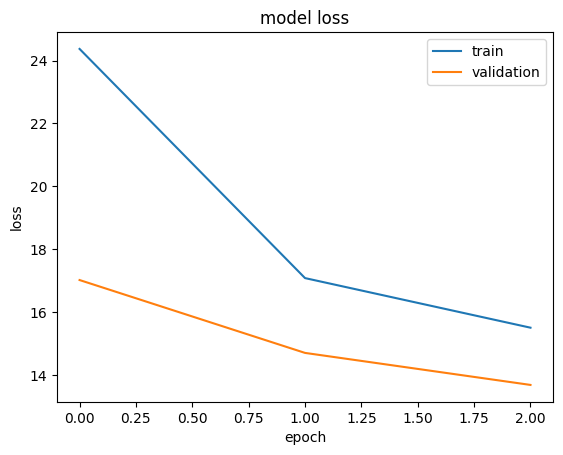

Model: "model_18"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_37 (InputLayer)          [(None, 100, 12)]    0           []                               
                                                                                                  
 batch_normalization_92 (BatchN  (None, 100, 12)     48          ['input_37[0][0]']               
 ormalization)                                                                                    
                                                                                                  
 input_38 (InputLayer)          [(None, 100, 6, 2)]  0           []                               
                                                                                                  
 conv1d_56 (Conv1D)             (None, 100, 64)      2368        ['batch_normalization_92[0

In [ ]:
#### Main Model ####

inputs_1D = tf.keras.layers.Input( shape=(w,12) )
inputs_2D = tf.keras.layers.Input( shape=(w,6,2) )


inputs_1D_N=BatchNormalization()(inputs_1D)
inputs_2D_N=BatchNormalization()(inputs_2D)


output_1,output_2,output_3,output=Gait_Net(inputs_1D_N,inputs_2D_N)

model = Model(inputs=[inputs_1D, inputs_2D], outputs=[output_1,output_2,output_3,output])
model.compile(loss=correlation_coefficient_loss_joint_6, optimizer='Adam')


history=model.fit([np.array(train_X_1D),np.array(train_X_2D)], [train_y_5,train_y_5,train_y_5,train_y_5], epochs=30, batch_size=64, validation_data=([X_validation_1D,\
                                                                      X_validation_2D], [Y_validation,Y_validation,Y_validation,Y_validation]), verbose=2, shuffle=False)

filename = path+'model_Gait_JL_A_Net_6.h5'
model.save(filename)
print('>Saved %s' % filename)

# # # summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()
model.summary()


In [ ]:
gc.collect()
gc.collect()
gc.collect()
gc.collect()

0

In [ ]:
model_path = path+'model_Gait_JL_A_Net_6.h5'
model=load_model(model_path, custom_objects={'correlation_coefficient_loss_joint_6': correlation_coefficient_loss_joint_6})

[yhat_1,yhat_2,yhat_3,yhat_4]=model.predict([test_X_1D,test_X_2D])


 ### Present ###
yhat_5=yhat_4.reshape((yhat_4.shape[0]*w,6))
test_y_r=test_y.reshape((test_y.shape[0]*w,6))

print(yhat_4.shape)

### Unpack ###
yhat_up=unpack_dataset_present(np.array(yhat_5))
test_y_up=unpack_dataset_present(np.array(test_y_r))

print(yhat_up.shape,test_y_up.shape)

### Present ###

yhat_up=yhat_up.reshape(int(len(yhat_up)/6),6)
test_y_up=test_y_up.reshape(int(len(test_y_up)/6),6)

print(yhat_up.shape,test_y_up.shape)

105/105 [==============================] - 6s 21ms/step
(3358, 600)
(1007400,) (1007400,)
(167900, 6) (167900, 6)


In [ ]:
### Present ###

rmse,p= prediction_test(np.array(yhat_up),np.array(test_y_up))

print(rmse[0])
print(rmse[1])
print(rmse[2])

m=np.mean(rmse)

print('\n')
print(m)

print('\n')

print(p[0])
print(p[1])
print(p[2])
print('\n')

print(np.mean(p))

4.883033364123528
5.3463120553915005
3.3744605446664253


4.534601988060484


0.9636719330199082
0.9736883242978567
0.9389719616207143


0.9587774063128264


In [ ]:
RMSE_Gait_JL_A_Net_6=rmse
PCC_Gait_JL_A_Net_6=p

Ablation_16=np.hstack([RMSE_Gait_JL_A_Net_6,PCC_Gait_JL_A_Net_6])

## 17. Gait-JL-Net_8+Augmentation

Epoch 1/3
958/958 - 94s - loss: 24.8956 - dense_104_loss: 6.6288 - dense_105_loss: 6.3168 - dense_106_loss: 6.1301 - average_12_loss: 5.8198 - val_loss: 17.1069 - val_dense_104_loss: 4.4447 - val_dense_105_loss: 4.3649 - val_dense_106_loss: 4.2603 - val_average_12_loss: 4.0369 - 94s/epoch - 98ms/step
Epoch 2/3
958/958 - 64s - loss: 17.3213 - dense_104_loss: 4.5629 - dense_105_loss: 4.4789 - dense_106_loss: 4.3597 - average_12_loss: 3.9198 - val_loss: 15.0762 - val_dense_104_loss: 3.8420 - val_dense_105_loss: 3.8652 - val_dense_106_loss: 3.8426 - val_average_12_loss: 3.5263 - 64s/epoch - 67ms/step
Epoch 3/3
958/958 - 64s - loss: 15.7395 - dense_104_loss: 4.1534 - dense_105_loss: 4.0852 - dense_106_loss: 3.9765 - average_12_loss: 3.5244 - val_loss: 13.9697 - val_dense_104_loss: 3.5513 - val_dense_105_loss: 3.6086 - val_dense_106_loss: 3.5571 - val_average_12_loss: 3.2527 - 64s/epoch - 67ms/step
>Saved /content/model_Gait_JL_A_Net_8.h5


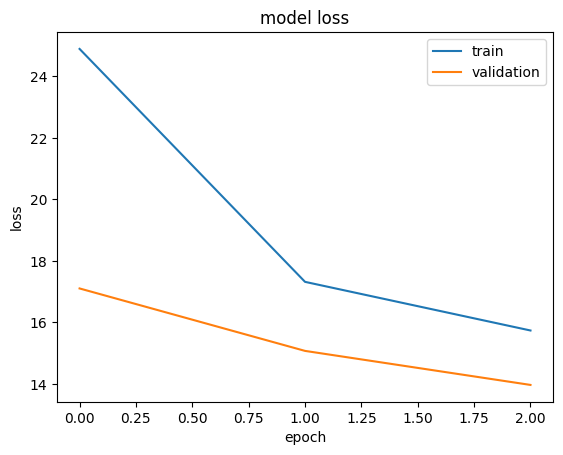

Model: "model_19"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_39 (InputLayer)          [(None, 100, 12)]    0           []                               
                                                                                                  
 batch_normalization_98 (BatchN  (None, 100, 12)     48          ['input_39[0][0]']               
 ormalization)                                                                                    
                                                                                                  
 input_40 (InputLayer)          [(None, 100, 6, 2)]  0           []                               
                                                                                                  
 conv1d_60 (Conv1D)             (None, 100, 64)      2368        ['batch_normalization_98[0

In [ ]:
#### Main Model ####

inputs_1D = tf.keras.layers.Input( shape=(w,12) )
inputs_2D = tf.keras.layers.Input( shape=(w,6,2) )


inputs_1D_N=BatchNormalization()(inputs_1D)
inputs_2D_N=BatchNormalization()(inputs_2D)


output_1,output_2,output_3,output=Gait_Net(inputs_1D_N,inputs_2D_N)

model = Model(inputs=[inputs_1D, inputs_2D], outputs=[output_1,output_2,output_3,output])
model.compile(loss=correlation_coefficient_loss_joint_8, optimizer='Adam')


history=model.fit([np.array(train_X_1D),np.array(train_X_2D)], [train_y_5,train_y_5,train_y_5,train_y_5], epochs=30, batch_size=64, validation_data=([X_validation_1D,\
                                                                      X_validation_2D], [Y_validation,Y_validation,Y_validation,Y_validation]), verbose=2, shuffle=False)

filename = path+'model_Gait_JL_A_Net_8.h5'
model.save(filename)
print('>Saved %s' % filename)

# # # summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()
model.summary()


In [ ]:
gc.collect()
gc.collect()
gc.collect()
gc.collect()

0

In [ ]:
model_path = path+'model_Gait_JL_A_Net_8.h5'
model=load_model(model_path, custom_objects={'correlation_coefficient_loss_joint_8': correlation_coefficient_loss_joint_8})

[yhat_1,yhat_2,yhat_3,yhat_4]=model.predict([test_X_1D,test_X_2D])


 ### Present ###
yhat_5=yhat_4.reshape((yhat_4.shape[0]*w,6))
test_y_r=test_y.reshape((test_y.shape[0]*w,6))

print(yhat_4.shape)

### Unpack ###
yhat_up=unpack_dataset_present(np.array(yhat_5))
test_y_up=unpack_dataset_present(np.array(test_y_r))

print(yhat_up.shape,test_y_up.shape)

### Present ###

yhat_up=yhat_up.reshape(int(len(yhat_up)/6),6)
test_y_up=test_y_up.reshape(int(len(test_y_up)/6),6)

print(yhat_up.shape,test_y_up.shape)

105/105 [==============================] - 6s 21ms/step
(3358, 600)
(1007400,) (1007400,)
(167900, 6) (167900, 6)


In [ ]:
### Present ###

rmse,p= prediction_test(np.array(yhat_up),np.array(test_y_up))

print(rmse[0])
print(rmse[1])
print(rmse[2])

m=np.mean(rmse)

print('\n')
print(m)

print('\n')

print(p[0])
print(p[1])
print(p[2])
print('\n')

print(np.mean(p))

4.7959224580897395
5.135687067524376
3.2043774057241716


4.378662310446096


0.9656384153362116
0.9757625537590788
0.945329325688918


0.9622434315947362


In [ ]:
RMSE_Gait_JL_A_Net_8=rmse
PCC_Gait_JL_A_Net_8=p

Ablation_17=np.hstack([RMSE_Gait_JL_A_Net_8,PCC_Gait_JL_A_Net_8])

## 18. Gait-JL-Net_10+Augmentation

Epoch 1/3
958/958 - 94s - loss: 25.4729 - dense_111_loss: 6.8250 - dense_112_loss: 6.4530 - dense_113_loss: 6.2316 - average_13_loss: 5.9632 - val_loss: 17.4517 - val_dense_111_loss: 4.5632 - val_dense_112_loss: 4.4293 - val_dense_113_loss: 4.3502 - val_average_13_loss: 4.1089 - 94s/epoch - 98ms/step
Epoch 2/3
958/958 - 64s - loss: 17.5573 - dense_111_loss: 4.6475 - dense_112_loss: 4.5384 - dense_113_loss: 4.4030 - average_13_loss: 3.9683 - val_loss: 15.4292 - val_dense_111_loss: 3.9834 - val_dense_112_loss: 3.9360 - val_dense_113_loss: 3.9061 - val_average_13_loss: 3.6037 - 64s/epoch - 67ms/step
Epoch 3/3
958/958 - 64s - loss: 15.9203 - dense_111_loss: 4.2282 - dense_112_loss: 4.1321 - dense_113_loss: 4.0031 - average_13_loss: 3.5569 - val_loss: 14.1449 - val_dense_111_loss: 3.6409 - val_dense_112_loss: 3.6406 - val_dense_113_loss: 3.5616 - val_average_13_loss: 3.3018 - 64s/epoch - 67ms/step
>Saved /content/model_Gait_JL_A_Net_10.h5


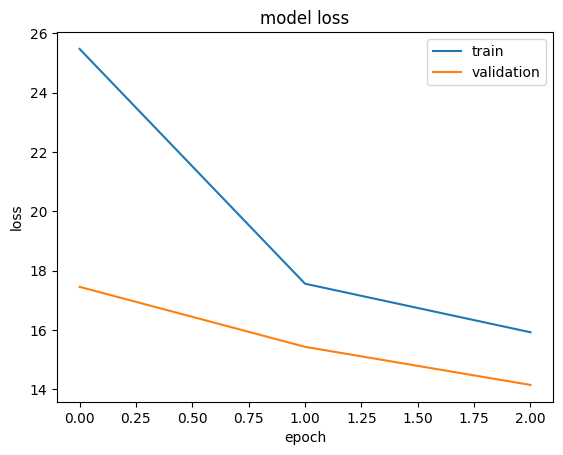

Model: "model_20"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_41 (InputLayer)          [(None, 100, 12)]    0           []                               
                                                                                                  
 batch_normalization_104 (Batch  (None, 100, 12)     48          ['input_41[0][0]']               
 Normalization)                                                                                   
                                                                                                  
 input_42 (InputLayer)          [(None, 100, 6, 2)]  0           []                               
                                                                                                  
 conv1d_64 (Conv1D)             (None, 100, 64)      2368        ['batch_normalization_104[

In [ ]:
#### Main Model ####

inputs_1D = tf.keras.layers.Input( shape=(w,12) )
inputs_2D = tf.keras.layers.Input( shape=(w,6,2) )


inputs_1D_N=BatchNormalization()(inputs_1D)
inputs_2D_N=BatchNormalization()(inputs_2D)


output_1,output_2,output_3,output=Gait_Net(inputs_1D_N,inputs_2D_N)

model = Model(inputs=[inputs_1D, inputs_2D], outputs=[output_1,output_2,output_3,output])
model.compile(loss=correlation_coefficient_loss_joint_10, optimizer='Adam')


history=model.fit([np.array(train_X_1D),np.array(train_X_2D)], [train_y_5,train_y_5,train_y_5,train_y_5], epochs=30, batch_size=64, validation_data=([X_validation_1D,\
                                                                      X_validation_2D], [Y_validation,Y_validation,Y_validation,Y_validation]), verbose=2, shuffle=False)

filename = path+'model_Gait_JL_A_Net_10.h5'
model.save(filename)
print('>Saved %s' % filename)

# # # summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()
model.summary()


In [ ]:
gc.collect()
gc.collect()
gc.collect()
gc.collect()

0

In [ ]:
model_path = path+'model_Gait_JL_A_Net_10.h5'
model=load_model(model_path, custom_objects={'correlation_coefficient_loss_joint_10': correlation_coefficient_loss_joint_10})

[yhat_1,yhat_2,yhat_3,yhat_4]=model.predict([test_X_1D,test_X_2D])


 ### Present ###
yhat_5=yhat_4.reshape((yhat_4.shape[0]*w,6))
test_y_r=test_y.reshape((test_y.shape[0]*w,6))

print(yhat_4.shape)


### Unpack ###
yhat_up=unpack_dataset_present(np.array(yhat_5))
test_y_up=unpack_dataset_present(np.array(test_y_r))


print(yhat_up.shape,test_y_up.shape)

### Present ###

yhat_up=yhat_up.reshape(int(len(yhat_up)/6),6)
test_y_up=test_y_up.reshape(int(len(test_y_up)/6),6)

print(yhat_up.shape,test_y_up.shape)

105/105 [==============================] - 6s 21ms/step
(3358, 600)
(1007400,) (1007400,)
(167900, 6) (167900, 6)


In [ ]:
### Present ###

rmse,p= prediction_test(np.array(yhat_up),np.array(test_y_up))

print(rmse[0])
print(rmse[1])
print(rmse[2])

m=np.mean(rmse)

print('\n')
print(m)

print('\n')

print(p[0])
print(p[1])
print(p[2])
print('\n')

print(np.mean(p))

4.962738645936229
5.379257372163988
3.256918311203039


4.5329714431010855


0.9640404530882711
0.9735836150567745
0.9426015784024147


0.9600752155158201


In [ ]:
RMSE_Gait_JL_A_Net_10=rmse
PCC_Gait_JL_A_Net_10=p

Ablation_18=np.hstack([RMSE_Gait_JL_A_Net_10,PCC_Gait_JL_A_Net_10])

# Results

In [ ]:
all_results=np.vstack([Ablation_1,Ablation_2,Ablation_3,Ablation_4,Ablation_5,Ablation_6,Ablation_7,Ablation_8,Ablation_9,Ablation_10,Ablation_11,Ablation_12,Ablation_13,Ablation_14,Ablation_15,Ablation_16,Ablation_17,Ablation_18])
from numpy import savetxt

savetxt('/content/drive/My Drive/Conference paper/subject 2/subject_2_results.csv', all_results, delimiter=',')